# Carbon instensity of Sustainable PV for Energy Transition
This analysis explores the carbon implications of different PV sustainability/circular economy designs in the context of achieving energy transition. These calculations build upon previous work that can be found in journals 13 and 17.

Attempt 1

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'CarbonAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
carbonfolder = str(Path().resolve().parent.parent / 'PV_ICE'/ 'baselines'/ 'CarbonLayer')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')
energyanalysisfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.11.5


In [3]:
import PV_ICE
PV_ICE.__version__

''

In [4]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', #BAU, 4 grays, perc, shj, topcon, irena
              #'#067872','#0aa39e','#09d0cd','#00ffff', #realistic cases (4) teals, perc, shj, topcon, irena
              '#0579C1','#C00000','#FFC000', #extreme cases (3) long life, high eff, circular
                '#6E30A0','#00B3B5','#10C483', #ambitious modules (5) high eff+ long life, 50 yr perc, recycleSi, 
               '#97CB3F','#FF7E00' #circular perovskite+life, circular perovkiste+ high eff
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B', 'black'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV_ICE','PERC','SHJ','TOPCon','Low\nQuality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff\n+ Long-life','Long-Life\n+ Recycling',
                         'Recycled-Si\n+ Long-life','Circular\n+ Long-life',
                        'Circular\n+ High Eff'
                    ]  

scennames_labels_flat = ['PV_ICE','PERC','SHJ','TOPCon','Low Quality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff + Long-life','Long-Life + Recycling',
                         'Recycled-Si + Long-life','Circular + Long-life',
                        'Circular + High Eff'
                    ] 

In [5]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [6]:
#load in the simulation from Energy Analysis journal
sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\sim1.pkl')

sim1.calculateCarbonFlows()

In [87]:
#sim1.calculateEnergyFlow()

In [26]:
sim1.scenario['r_PERC'].dataOut_e

mod_MFG   mod_Install  mod_OandM  mod_Repair   mod_Demount  \
0    5.595432e+10  5.724557e+07        0.0         0.0  0.000000e+00   
1    1.962572e+10  1.986038e+07        0.0         0.0  3.657513e-01   
2    2.379485e+10  2.382044e+07        0.0         0.0  2.825729e+01   
3    3.657938e+10  3.622915e+07        0.0         0.0  3.455821e+02   
4    7.544213e+10  7.393329e+07        0.0         0.0  1.984355e+03   
..            ...           ...        ...         ...           ...   
96   3.042066e+12  8.530612e+09        0.0         0.0  8.530612e+09   
97   3.042066e+12  8.530612e+09        0.0         0.0  8.530612e+09   
98   3.042066e+12  8.530612e+09        0.0         0.0  8.530612e+09   
99   3.042066e+12  8.530612e+09        0.0         0.0  8.530612e+09   
100  3.042066e+12  8.530612e+09        0.0         0.0  8.530612e+09   

     mod_Store  mod_Resell_Certify  mod_ReMFG_Disassembly  mod_Recycle_Crush  \
0          0.0                 0.0                    0.0       0.000000e+00   
1          0.0                 0.0                    0.0       1.547705e+00   
2          0.0                 0.0                    0.0       1.195730e+02   
3          0.0                 0.0                    0.0       1.462358e+03   
4          0.0                 0.0                    0.0       8.396954e+03   
..         ...                 ...                    ...                ...   
96         0.0                 0.0                    0.0       4.286633e+11   
97         0.0                 0.0                    0.0       4.286633e+11   
98         0.0                 0.0                    0.0       4.286633e+11   
99         0.0                 0.0                    0.0       4.286633e+11   
100        0.0                 0.0                    0.0       4.286633e+11   

     e_out_annual_[Wh]  
0         1.378769e+12  
1         1.853184e+12  
2         2.425924e+12  
3         3.307904e+12  
4         5.136280e+12  
..                 ...  
96        1.296137e+16  
97        1.296137e+16  
98        1.296137e+16  
99        1.296137e+16  
100       1.296137e+16  

[101 rows x 10 columns]

## Project grid forward to 100% re in 2050
To parallel the PV deployment, we will assume that we globally hit 100% RE in 2050 with the 75 TW of PV. As such, we need to change the future projection of marketshares of the different country grids.

One scenario with decarb grid, one scenario with decarb grid and heat

Estimating that 60-70% generation will be from Solar, 30-40% from wind, and any remainder from "other renewables"

In [27]:
countrygridmix = pd.read_csv(os.path.join(carbonfolder,'baseline_countrygridmix.csv'), index_col='year')
gridsources = ['Bioenergy','Hydro','Nuclear','OtherFossil','OtherRenewables','Solar','Wind']
nonRE = ['Coal','Gas','OtherFossil','Nuclear','Bioenergy']

In [28]:
countrygridmix.loc[2023:,:]=np.nan #delete 2023 to 2050
nonRE_search = '|'.join(nonRE) #create nonRE search
countrygridmix.loc[2050, countrygridmix.columns.str.contains(nonRE_search)] = 0.0 #set all nonRE to 0 in 2050

In [29]:
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Solar')] = 63.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Wind')] = 33.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Hydro')] = 3.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('OtherRenewables')] = 1.0
#numbers derived from leading scenario electricity generation Breyer et al 2022 scenarios (EU focused)

In [30]:
countrygridmix_100RE2050 = countrygridmix.interpolate() #linearly interpolate between 2022 and 2050

In [31]:
apnd_idx = pd.RangeIndex(start=2051,stop=2101,step=1) #create temp df
apnd_df = pd.DataFrame(columns=countrygridmix_100RE2050.columns, index=apnd_idx )
countrygridmix_100RE20502100 = pd.concat([countrygridmix_100RE2050.loc[2000:],apnd_df], axis=0) #extend through 2100
countrygridmix_100RE20502100.ffill(inplace=True) #propogate 2050 values through 2100

In [32]:
countrygridmix_100RE20502100.loc[2050]

China_Bioenergy            0.0
China_Coal                 0.0
China_Gas                  0.0
China_Hydro                3.0
China_Nuclear              0.0
                          ... 
Zambia_Nuclear             0.0
Zambia_OtherFossil         0.0
Zambia_OtherRenewables     1.0
Zambia_Solar              63.0
Zambia_Wind               33.0
Name: 2050, Length: 472, dtype: float64

This is a simple projection, assumes all countries have same ratio of PV and wind (which we know can't be true). Update in future with country specific projections.

In [33]:
pd.read_csv(os.path.join(carbonfolder,'baseline_electricityemissionfactors.csv'), index_col=[0])

CO2eq_gpWh_IPCC2006  CO2eq_gpWh_ember  CO2_gpWh_EIA  \
Energy Source                                                          
Bioenergy                     0.3005             0.230        0.0000   
Coal                          0.3487             0.820        0.3215   
Gas                           0.2291             0.490        0.1805   
Hydro                         0.0000             0.024        0.0000   
Nuclear                       0.0000             0.012        0.0000   
OtherFossil                   0.2671             0.700        0.2413   
OtherRenewables               0.0000             0.038        0.0000   
Solar                         0.0000             0.048        0.0000   
Wind                          0.0000             0.011        0.0000   
SteamAndHeat                  0.0000             0.000        0.0000   

                 CO2_gpWh_EPA  
Energy Source                  
Bioenergy              0.3170  
Coal                   0.3380  
Gas                    0.1810  
Hydro                  0.0000  
Nuclear                0.0000  
OtherFossil            0.0000  
OtherRenewables        0.0000  
Solar                  0.0000  
Wind                   0.0000  
SteamAndHeat           0.2266

In [34]:
sim1.calculateCarbonFlows(countrygridmixes=countrygridmix_100RE20502100)



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  PV_ICE
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_PERC
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_SHJ
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on C

# Carbon Analysis
this will become the aggregate carbon results function

In [35]:
scenarios = sim1.scenario

In [36]:
#simply group mod and mats carbon dfs by scenario
sim_carbon_dfs = pd.DataFrame()

for scen in scenarios:
    print(scen)
    mod_carbon_scen_results = sim1.scenario[scen].dataOut_c.add_prefix(str(scen+'_'))
    
    scenmatdc = pd.DataFrame()
    for mat in MATERIALS:
        print(mat)
        mat_carbon_scen_results = sim1.scenario[scen].material[mat].matdataOut_c.add_prefix(str(scen+'_'+mat+'_')) 
        scenmatdc = pd.concat([scenmatdc,mat_carbon_scen_results], axis=1) #group all material dc
    
    scen_carbon_results = pd.concat([mod_carbon_scen_results,scenmatdc], axis=1) #append mats to mod
    sim_carbon_dfs = pd.concat([sim_carbon_dfs, scen_carbon_results], axis=1) #append all scens "raw" data

#FIX INDEX of dfs
sim_carbon_dfs.index = pd.RangeIndex(start=2000,stop=2101,step=1)
    
#return sim_carbon_results, sim_annual_carbon

PV_ICE
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_SHJ
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_TOPCon
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_IRENA
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_High_eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Circular
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_EffLife
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_50PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_RecycledPERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_Eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
b

In [37]:
#Do math on the carbon dfs, take in the output aggregate sim df
sim_annual_carbon = pd.DataFrame()
for scen in scenarios:
    mod_mfg_carbon_total = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #annual mfging elec carbon
    mod_nonvMFG = ['Install','OandM','Repair','Demount','Store','Resell','ReMFG','Recycle'] #could remove from loop
    nonvMFG_search = '|'.join(mod_nonvMFG) #create nonRE search
    mod_carbon_sum_nonvmfg = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(nonvMFG_search)].filter(like=scen).filter(like='_mod_') #annual non mfging carbon
    scen_annual_carbon_mod = pd.concat([mod_mfg_carbon_total,mod_carbon_sum_nonvmfg], axis=1)
    scen_annual_carbon_mod[scen+'_Annual_Emit_mod_elec_gCO2eq'] = scen_annual_carbon_mod.sum(axis=1)

    scenmatdcmaths = pd.DataFrame()
    for mat in MATERIALS:
        scen_mat_dc_temp = sim_carbon_dfs.filter(like=scen).filter(like=mat)
        #calculation for annual carbon emissions total (selecting to avoid double countings)
        mat_global_vmfg_elec = scen_mat_dc_temp.filter(like='Global_vmfg_elec') #select global mod mfging
        mat_vmfg_countries = scen_mat_dc_temp.filter(like='vmfg_elec') #select country specific mod mfging, includes global
        mat_emit_lifecycle = scen_mat_dc_temp.loc[:,~scen_mat_dc_temp.columns.isin(mat_vmfg_countries.columns)] #select everything not the two above
        
        scen_mat_annual_carbon = pd.concat([mat_global_vmfg_elec,mat_emit_lifecycle], axis=1) #group global mod, lifecycle
        scen_mat_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq'] = scen_mat_annual_carbon.sum(axis=1) #sum annual emit
        
        scenmatdcmaths = pd.concat([scenmatdcmaths,scen_mat_annual_carbon], axis=1)
        #add by material
        #add by process, fuel, elec
        
        #mat_ce_recycle = mat_carbon_scen_results.filter(like='Recycle_e_p')
        #mat_ce_remfg = mat_carbon_scen_results.filter(like='ReMFG_clean')
        #mat_landfill = mat_carbon_scen_results.filter(like='landfill_total')
        #mat_scen_annual_carbon = pd.concat([mat_vmfg_total,mat_ce_recycle,mat_ce_remfg,mat_landfill], axis=1)
    scen_modmat_annual_carbon = pd.concat([scen_annual_carbon_mod,scenmatdcmaths], axis=1)
    scen_modmat_annual_carbon[scen+'_Annual_Emit_total_modmats_gCO2eq'] = scen_modmat_annual_carbon.filter(like='Annual_Emit').sum(axis=1)
    
    sim_annual_carbon = pd.concat([sim_annual_carbon, scen_modmat_annual_carbon], axis=1)


    #FIX INDEX of dfs
sim_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)


In [38]:
#create cumulative
sim_cumu_carbon = sim_annual_carbon.cumsum()
maxy = round(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq').max()/1e12,-3) #for graphing
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq')

PV_ICE_Annual_Emit_total_modmats_gCO2eq               1.731339e+16
r_PERC_Annual_Emit_total_modmats_gCO2eq               1.636384e+16
r_SHJ_Annual_Emit_total_modmats_gCO2eq                1.588159e+16
r_TOPCon_Annual_Emit_total_modmats_gCO2eq             1.606521e+16
r_IRENA_Annual_Emit_total_modmats_gCO2eq              1.772711e+16
ex_Life_Annual_Emit_total_modmats_gCO2eq              1.721522e+16
ex_High_eff_Annual_Emit_total_modmats_gCO2eq          1.406457e+16
ex_Circular_Annual_Emit_total_modmats_gCO2eq          1.274909e+16
h_EffLife_Annual_Emit_total_modmats_gCO2eq            1.498071e+16
h_50PERC_Annual_Emit_total_modmats_gCO2eq             1.643084e+16
h_RecycledPERC_Annual_Emit_total_modmats_gCO2eq       1.541015e+16
h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq    1.745636e+16
h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq     1.310788e+16
Name: 2100, dtype: float64

# Carbon Emissions Cumulative Scenario compare

In [39]:
sim_cumu_carbon_mmt = sim_cumu_carbon.filter(like='Annual_Emit_total_modmats_gCO2eq')/1e12
sim_cumu_carbon_mmt

PV_ICE_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.481254   
2001                                 1.959126   
2002                                 2.469489   
2003                                 3.165749   
2004                                 4.428939   
...                                       ...   
2096                             17182.803324   
2097                             17215.449452   
2098                             17248.095580   
2099                             17280.741708   
2100                             17313.387836   

      r_PERC_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.481254   
2001                                 1.959126   
2002                                 2.469489   
2003                                 3.165749   
2004                                 4.428939   
...                                       ...   
2096                             16335.571758   
2097                             16342.639071   
2098                             16349.706383   
2099                             16356.773696   
2100                             16363.841009   

      r_SHJ_Annual_Emit_total_modmats_gCO2eq  \
2000                                1.481254   
2001                                1.959126   
2002                                2.469489   
2003                                3.165749   
2004                                4.428939   
...                                      ...   
2096                            15854.212043   
2097                            15861.057255   
2098                            15867.902467   
2099                            15874.747679   
2100                            15881.592891   

      r_TOPCon_Annual_Emit_total_modmats_gCO2eq  \
2000                                   1.481254   
2001                                   1.959126   
2002                                   2.469489   
2003                                   3.165749   
2004                                   4.428939   
...                                         ...   
2096                               16037.500746   
2097                               16044.427997   
2098                               16051.355247   
2099                               16058.282498   
2100                               16065.209748   

      r_IRENA_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.481254   
2001                                  1.959126   
2002                                  2.469489   
2003                                  3.165749   
2004                                  4.428939   
...                                        ...   
2096                              17685.270799   
2097                              17695.730912   
2098                              17706.191025   
2099                              17716.651138   
2100                              17727.111251   

      ex_Life_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.481254   
2001                                  1.959126   
2002                                  2.469489   
2003                                  3.165749   
2004                                  4.428939   
...                                        ...   
2096                              17070.829739   
2097                              17106.965743   
2098                              17143.084065   
2099                              17179.175032   
2100                              17215.224298   

      ex_High_eff_Annual_Emit_total_modmats_gCO2eq  \
2000                                      1.481254   
2001                                      1.959126   
2002                                      2.469489   
2003                                      3.165749   
2004                                      4.428939   
...                                            ...   
2096                                  13953.778500   
2097

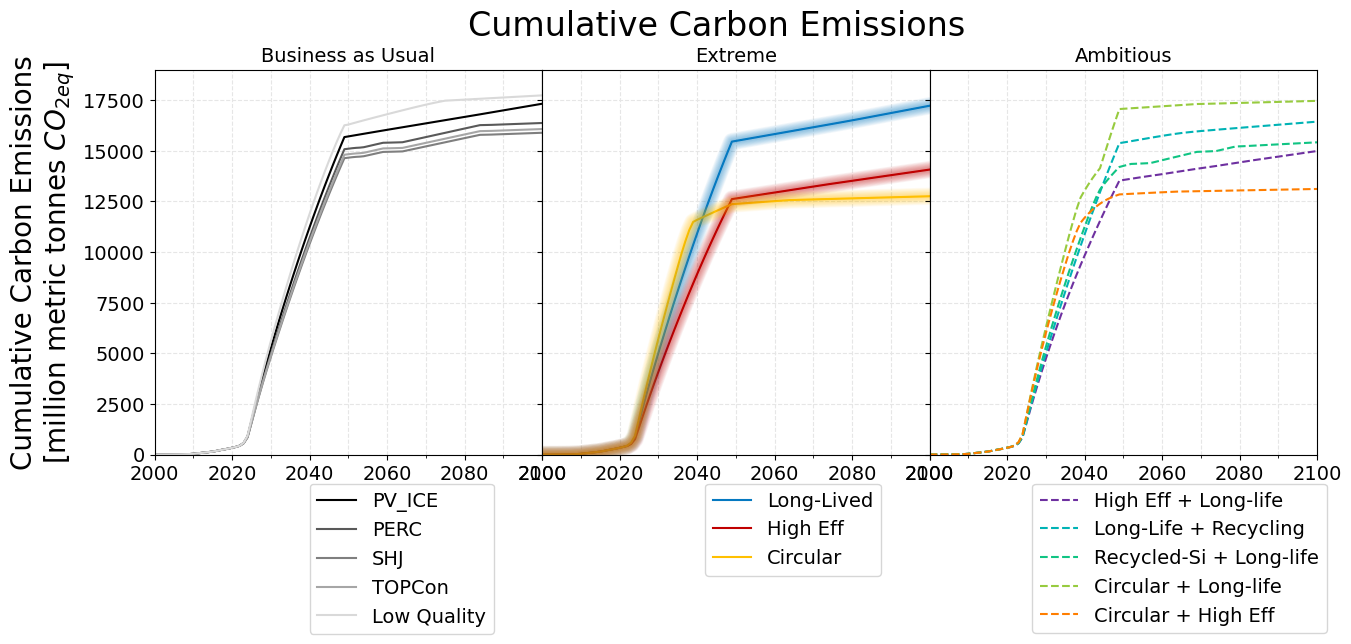

In [40]:

fig_cumu_carbon, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharey=True, sharex=True, 
                                      gridspec_kw={'wspace':0})

#BAU
ax1.set_prop_cycle(color=colorpalette[0:5])
ax1.plot(sim_cumu_carbon_mmt.iloc[:,0:5], label=scennames_labels_flat[0:5]) # baselines
ax1.set_title('Business as Usual', fontsize=14)
ax1.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax1.set_xlim(2000,2100)
ax1.legend(bbox_to_anchor=(0.9,-0.05))
ax1.set_ylim(0,maxy+1000)
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.grid(axis='both', which='both', color='0.9', ls='--') 


#Extreme
ax2.set_prop_cycle(color=colorpalette[5:8])

ax2.plot(sim_cumu_carbon_mmt.iloc[:,5:8], label=scennames_labels_flat[5:8])
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.grid(axis='both', which='both', color='0.9', ls='--') 

#create glowlines for Extreme scens
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,5],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[5])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,6],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[6])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,7],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[7])

ax2.set_title('Extreme', fontsize=14)
ax2.legend(bbox_to_anchor=(0.9,-0.05))

#Ambitious
ax3.set_prop_cycle(color=colorpalette[8:])
ax3.plot(sim_cumu_carbon_mmt.iloc[:,8:], label=scennames_labels_flat[8:], ls='--')# 
ax3.set_title('Ambitious', fontsize=14)
ax3.legend(bbox_to_anchor=(1.05,-0.05)) #(x,y)
ax3.xaxis.set_minor_locator(MultipleLocator(10))
ax3.grid(axis='both', which='both', color='0.9', ls='--') 

#overall figure

fig_cumu_carbon.suptitle('Cumulative Carbon Emissions', fontsize=24, y=1)
plt.show()
#fig_cumu_carbon.savefig('energyresults-annualMatDemands-decade.png', dpi=300, bbox_inches='tight')

# Literature Validation

In [41]:
#comparing to Ember open source data, uses a lifecycle PV emission factor from IPCC for electricity carbon
ember_PVCO2 = pd.read_csv(os.path.join(carbonfolder,'Ember-PVEmissionsWorld2000-2022.csv'), index_col='year')
#ember_PVCO2['emissions_mtco2'] #ANNUAL DATA
ember_PVCO2_cumu = ember_PVCO2.cumsum()

In [42]:
#compare to Fthenakis and Leccisi 2021 analysis
FL2021_gwp_scSi2020 = 1010 #kg CO2eq/kWp from Fthenakis and Leccisi 2021 "sc_Si 2020"
FL2021_gwp_scSi2015 = 2000 #"scSi 2015"
FL2021_gwp_mcSi2020 = 1087 #mcSi 2020
FL2021_gwp_mcSi2015 = 1435 #mcSi 2015

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

FL2021_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
FL2021_gwp_range['F&L_sc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2020
FL2021_gwp_range['F&L_sc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2015
FL2021_gwp_range['F&L_mc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2020
FL2021_gwp_range['F&L_mc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2015

FL2021_gwp_range_cumu_mmt = FL2021_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [43]:
#compare to Ultra Low Carbon Solar Alliance South Korea rating, as redproduced in Polverini 2023
Polverini2023_low = 550 #kg CO2eq/kWp "France"
Polverini2023_high = 762 #kg CO2eq/kWp "China"

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

Polverini2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
Polverini2023_gwp_range['Polverini2023_low'] = kw_installed_pvice.loc[:22].values*Polverini2023_low
Polverini2023_gwp_range['Polverini2023_high'] = kw_installed_pvice.loc[:22].values*Polverini2023_high

Polverini2023_gwp_range_cumu_mmt = Polverini2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [44]:
#compare to Liang and You 2023, using Figure 1 2020 values from a and e
LiangYou2023_scSi_low = 250 #kg CO2eq/m2 ""
LiangYou2023_scSi_high = 350 #kg CO2eq/m2 ""
LiangYou2023_mcSi_low = 210
LiangYou2023_mcSi_high = 300

m2_installed_pvice = sim1.scenario['PV_ICE'].dataOut_m['Area'] # area deployed in m2

LiangYou2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
LiangYou2023_gwp_range['LiangYou2023_scSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_low
LiangYou2023_gwp_range['LiangYou2023_scSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_high
LiangYou2023_gwp_range['LiangYou2023_mcSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_low
LiangYou2023_gwp_range['LiangYou2023_mcSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_high

LiangYou2023_gwp_range_cumu_mmt = LiangYou2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

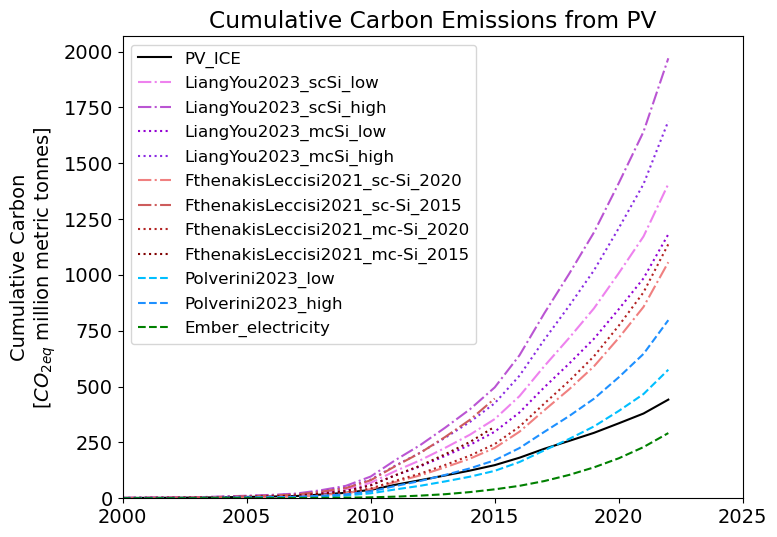

In [45]:
plt.plot(sim_cumu_carbon_mmt.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq'], label='PV_ICE', color='black')

plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_low'], label='LiangYou2023_scSi_low', color='violet', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_high'], label='LiangYou2023_scSi_high', color='mediumorchid', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_low'], label='LiangYou2023_mcSi_low', color='darkviolet', ls=':')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_high'], label='LiangYou2023_mcSi_high', color='blueviolet', ls=':')

plt.plot(FL2021_gwp_range_cumu_mmt['F&L_sc-Si_2020'], label='FthenakisLeccisi2021_sc-Si_2020', color='lightcoral', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_sc-Si_2015'], label='FthenakisLeccisi2021_sc-Si_2015', color='indianred', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt['F&L_mc-Si_2020'], label='FthenakisLeccisi2021_mc-Si_2020', color='firebrick', ls='dotted')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_mc-Si_2015'], label='FthenakisLeccisi2021_mc-Si_2015', color='maroon', ls='dotted')

plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue', ls='--')
plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue', ls='--')

plt.plot(ember_PVCO2_cumu.index, ember_PVCO2_cumu['emissions_mtco2'], label='Ember_electricity', color='green', ls='--')

plt.ylabel('Cumulative Carbon\n[$CO_{2eq}$ million metric tonnes]')
plt.title('Cumulative Carbon Emissions from PV')
plt.xlim(2000,2025)
plt.ylim(0,)
plt.legend(loc='upper left', fontsize=12)

## Flip it, compare on CO2eq/kWp
This is a simple way of doing it, will not work for much beyond 2022, because the annual emissions include end of life of other systems, not just the mfging of installed - its not necessarily fair. Might work out on balance, kinda

In [46]:
#lit factors into scatter points
litfactors = pd.DataFrame(index=ember_PVCO2_cumu.index)

litfactors.loc[2022,'Polverini2023_low'] = Polverini2023_low
litfactors.loc[2022,'Polverini2023_high'] = Polverini2023_high
litfactors.loc[2020,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2020 
litfactors.loc[2015,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2015 
litfactors.loc[2020,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2020
litfactors.loc[2015,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2015

litfactors.loc[2020,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_low #kg CO2eq/m2 ""
litfactors.loc[2019,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_high  #kg CO2eq/m2 ""
litfactors.loc[2020,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_low 
litfactors.loc[2019,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_high

litfactors.loc[2015,'Anctil2021_low'] = 1010
litfactors.loc[2015,'Anctil2021_high'] = 1775
litfactors.loc[2020,'Anctil2021_low'] = 500
litfactors.loc[2020,'Anctil2021_high'] = 750

litfactors.loc[2005,'Jungbluth2005_scSi_m$^{2}$'] = 170 #scSi CO2fossil, might be just module not full lifecycle

litfactors.loc[2020,'Wikoff2022_low_m$^{2}$'] = 125
litfactors.loc[2020,'Wikoff2022_high_m$^{2}$'] = 275


#litfactors

In [47]:
#calculate CO2eq/kWp by dividing annual CO2eq/deployed PV
installs = pd.DataFrame(kw_installed_pvice.loc[:22])
installs.index = ember_PVCO2_cumu.index

pvice_emit_annual = sim_annual_carbon.filter(like='PV_ICE').filter(like='Annual_Emit_total_modmats_gCO2eq').loc[:2022]
pvice_annual_kgco2pkwp = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(installs['new_Installed_Capacity_[MW]'], axis=0)/1e3
#pvice_annual_kgco2pkwp

In [48]:
#calculate CO2eq/m2 for PV ICE
meters2installs = pd.DataFrame(m2_installed_pvice.loc[:22])
meters2installs.index = ember_PVCO2_cumu.index

pvice_annual_kgco2eqpm2 = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(meters2installs['Area'], axis=0)/1e3
#pvice_annual_kgco2eqpm2

In [49]:
litfactors.columns

Index(['Polverini2023_low', 'Polverini2023_high', 'FthenakisLeccisi2021_scSi',
       'FthenakisLeccisi2021_mcSi', 'LiangYou2023_scSi_m$^{2}$',
       'LiangYou2023_mcSi_m$^{2}$', 'Anctil2021_low', 'Anctil2021_high',
       'Jungbluth2005_scSi_m$^{2}$', 'Wikoff2022_low_m$^{2}$',
       'Wikoff2022_high_m$^{2}$'],
      dtype='object')

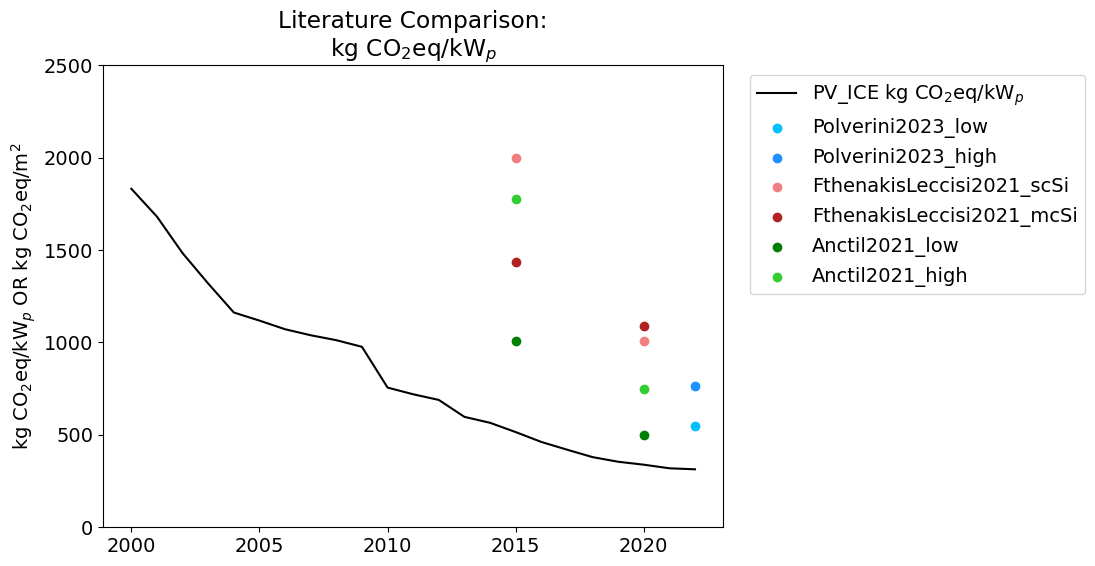

In [50]:
#graphing

plt.plot(pvice_annual_kgco2pkwp, label='PV_ICE kg CO$_{2}$eq/kW$_{p}$', color='black')

plt.scatter(litfactors.index, litfactors['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue')
plt.scatter(litfactors.index, litfactors['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue')

plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_scSi'], label='FthenakisLeccisi2021_scSi', color='lightcoral')
plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_mcSi'], label='FthenakisLeccisi2021_mcSi', color='firebrick')

plt.scatter(litfactors.index, litfactors['Anctil2021_low'], label='Anctil2021_low', color='green')
plt.scatter(litfactors.index, litfactors['Anctil2021_high'], label='Anctil2021_high', color='limegreen')


#plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

#plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
#plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

#plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')
plt.ylim(0,2500)
plt.ylabel('kg CO$_{2}$eq/kW$_{p}$ OR kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/kW$_{p}$')
plt.legend(bbox_to_anchor=(1.6,1))

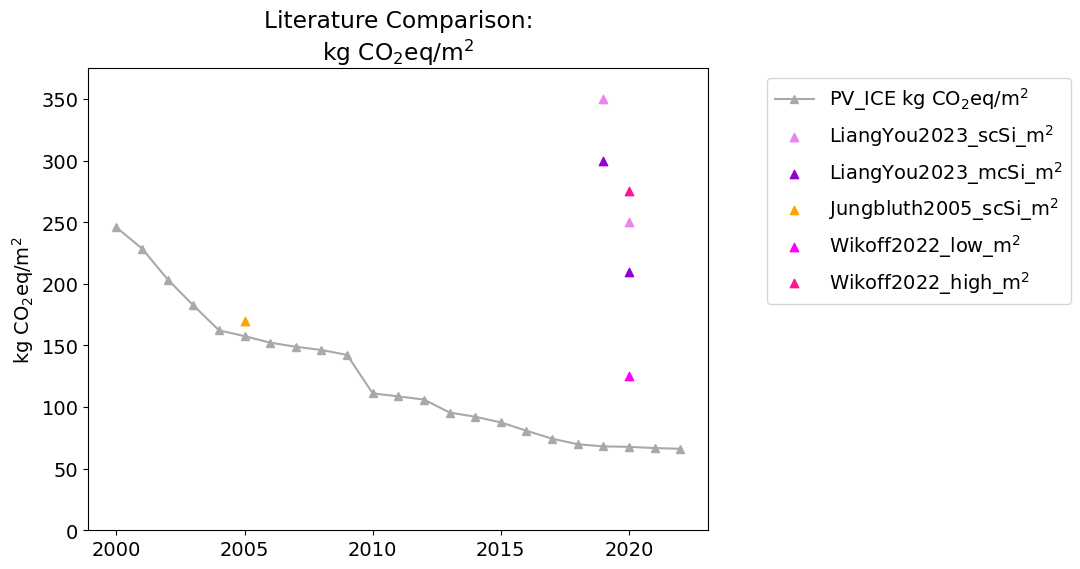

In [51]:
plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')

plt.scatter(litfactors.index, litfactors['Wikoff2022_low_m$^{2}$'], label='Wikoff2022_low_m$^{2}$', color='fuchsia', marker='^')
plt.scatter(litfactors.index, litfactors['Wikoff2022_high_m$^{2}$'], label='Wikoff2022_high_m$^{2}$', color='deeppink', marker='^')

plt.ylim(0,375)
plt.ylabel('kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/m$^{2}$')
plt.legend(bbox_to_anchor=(1.6,1))

# Contextualize versus Global Carbon Emissions and Budget

In [52]:
annualco2emitglobal_raw = pd.read_csv(os.path.join(carbonfolder,'WorldInData-annual-co2-emissions-per-country.csv'))
annualco2emitglobal_subset = annualco2emitglobal_raw.loc[(annualco2emitglobal_raw['Entity']=='World')&(annualco2emitglobal_raw['Year']>=2000), 'Year':]
annualco2emitglobal_subset.index=annualco2emitglobal_subset['Year']

#create % PV emit vs world
pvice_annualPVemit_bmt = sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15 #bmt
world_annual_bmt = annualco2emitglobal_subset.iloc[:,1]/1e9 #bmt

percentPVemitvsWorld = pvice_annualPVemit_bmt/world_annual_bmt*100

In [53]:
#cumulative compare
sim_cumu_carbon_bmt = sim_cumu_carbon_mmt.loc[:,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e3
sim_cumu_carbon_bmt

2000     0.001481
2001     0.001959
2002     0.002469
2003     0.003166
2004     0.004429
          ...    
2096    17.182803
2097    17.215449
2098    17.248096
2099    17.280742
2100    17.313388
Name: PV_ICE_Annual_Emit_total_modmats_gCO2eq, Length: 101, dtype: float64

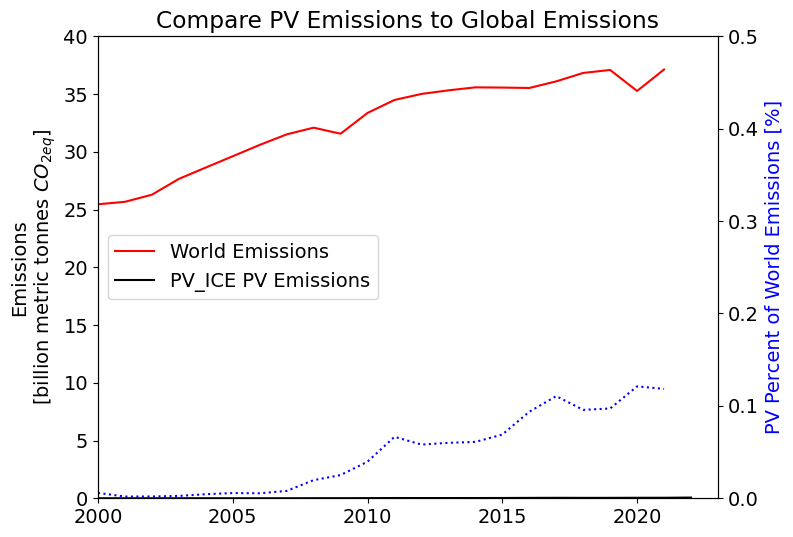

In [54]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Emissions', color='red') #bmt
ax1.plot(sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15,
         label='PV_ICE PV Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2023)

ax2 = ax1.twinx()
ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare PV Emissions to Global Emissions')
ax1.legend(loc='center left')
plt.show()

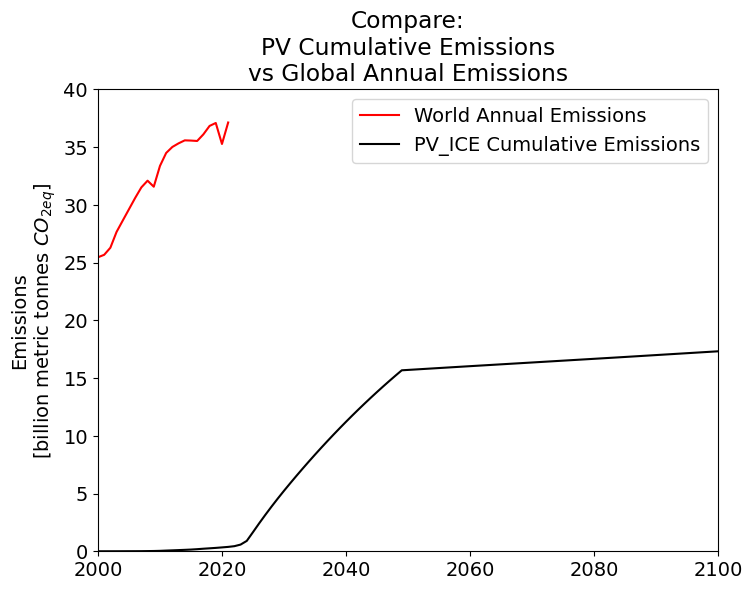

In [55]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Annual Emissions', color='red') #bmt
ax1.plot(sim_cumu_carbon_bmt, label='PV_ICE Cumulative Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2100)

#ax2 = ax1.twinx()
#ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
#ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
#ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare:\nPV Cumulative Emissions\nvs Global Annual Emissions')
ax1.legend(loc='upper right')
plt.show()

# Cabon Emissions by material or module

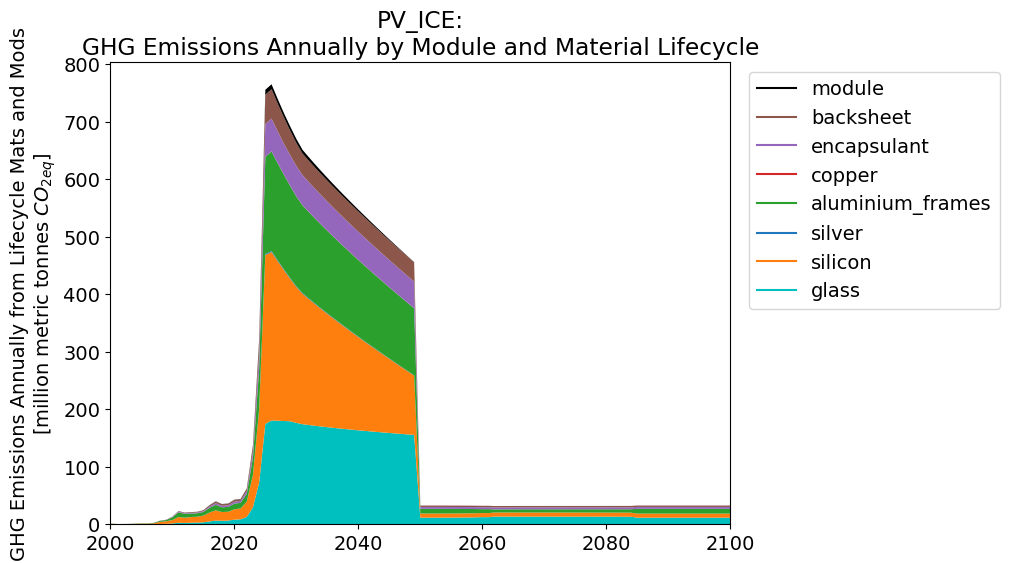

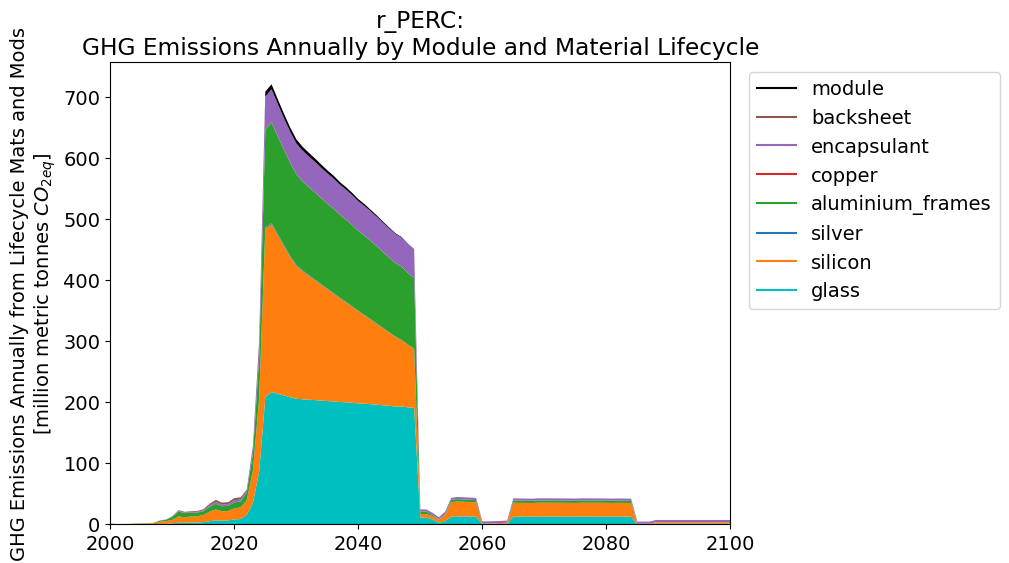

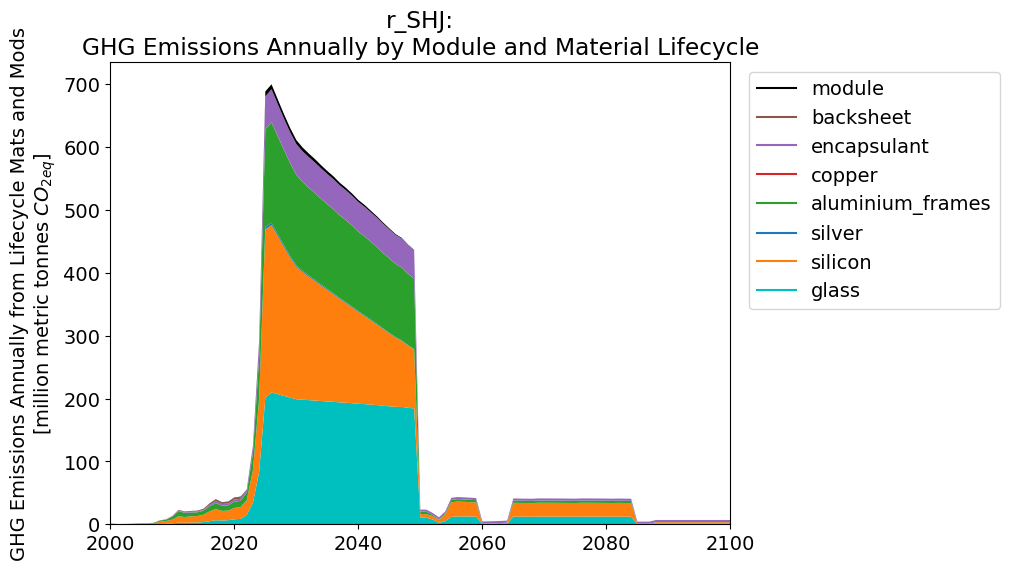

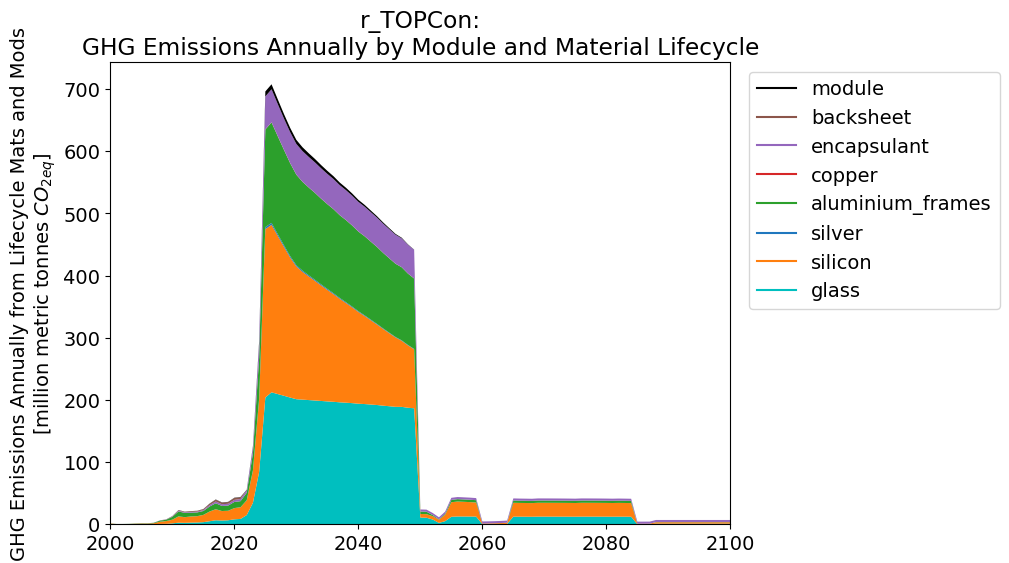

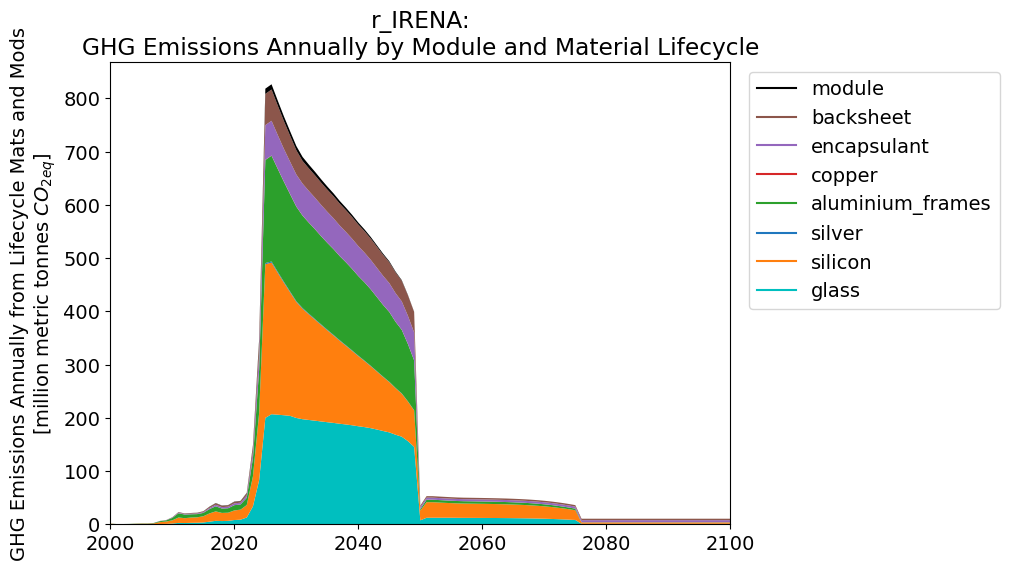

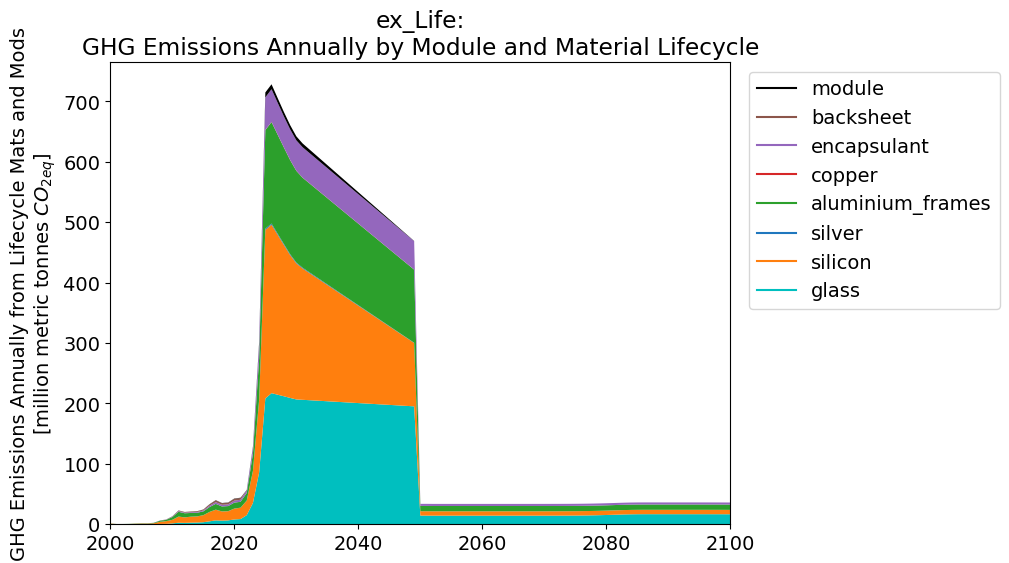

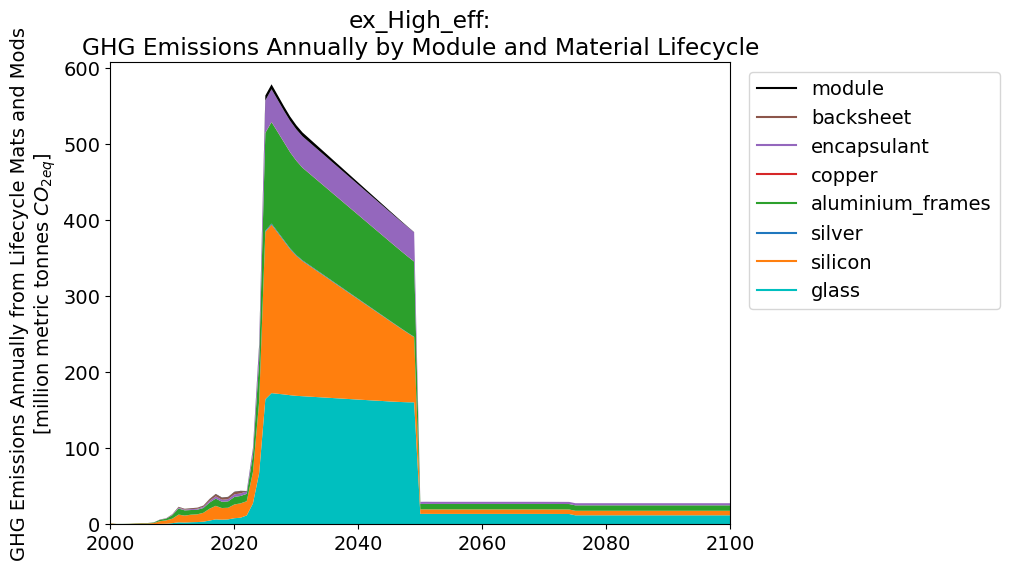

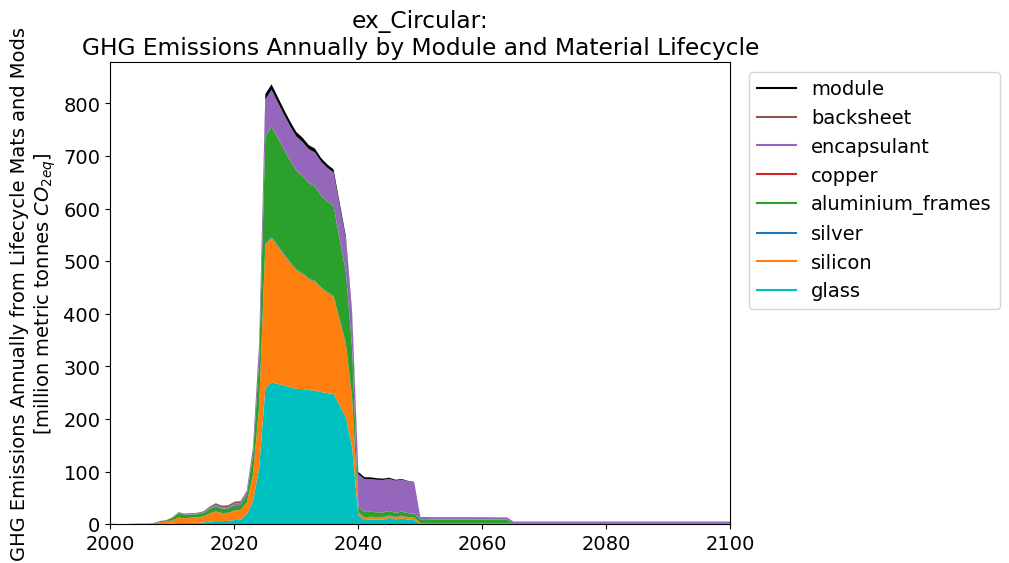

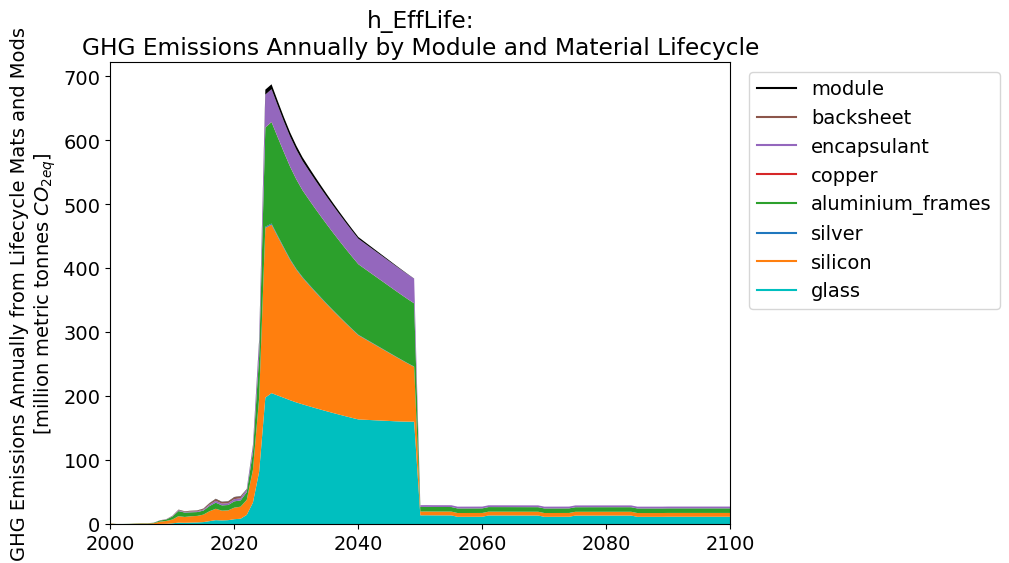

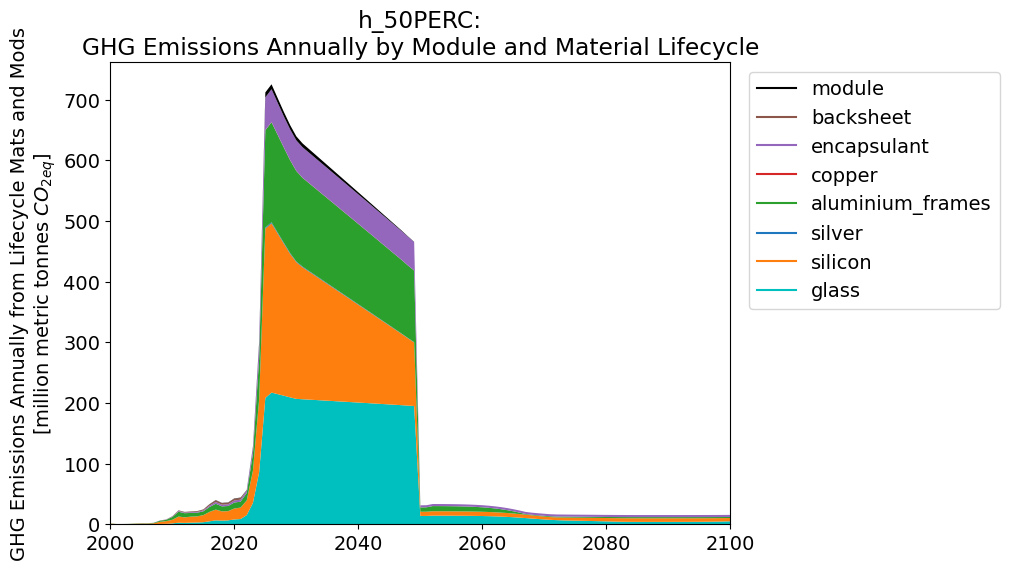

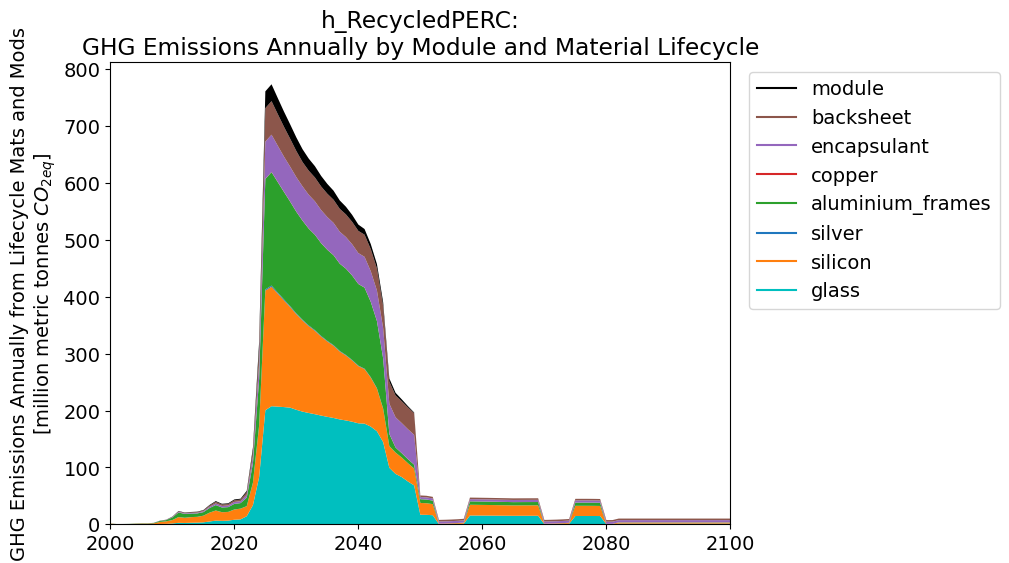

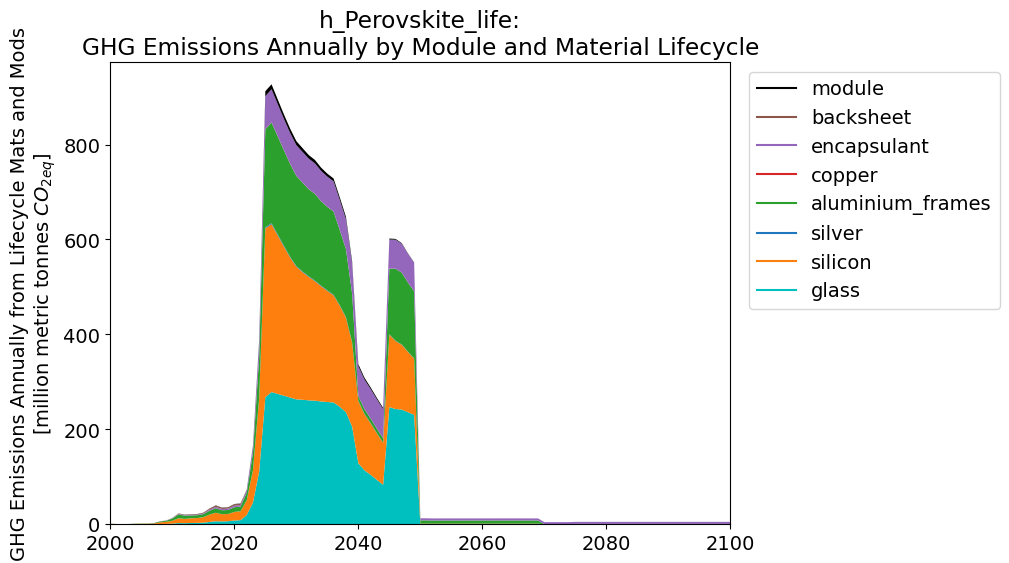

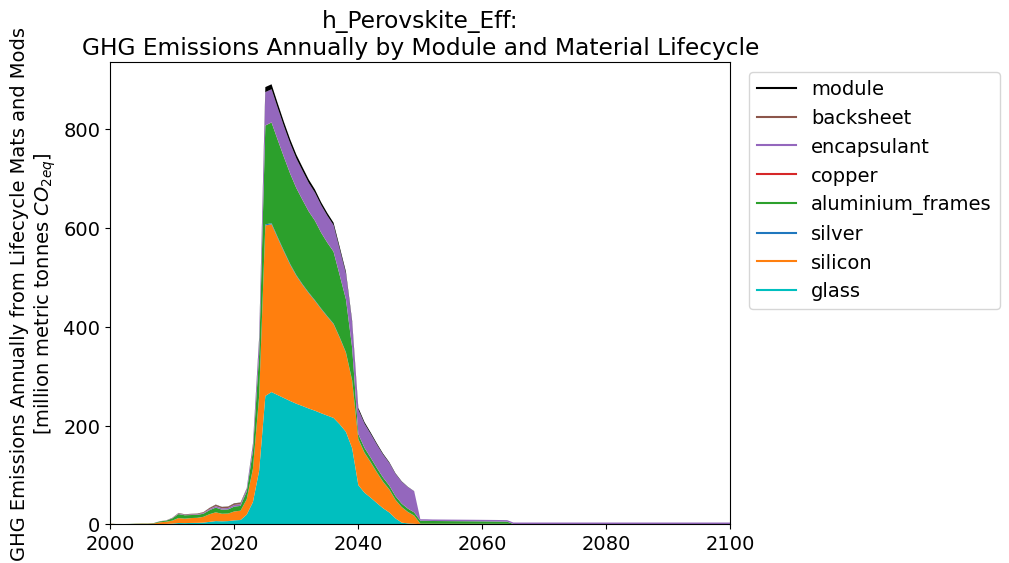

In [56]:
for scen in scenarios:

    scen_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_annual_carbon.index,
                  scen_annual_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))

#plt.legend()
    plt.show()

In [57]:
maxy

18000.0

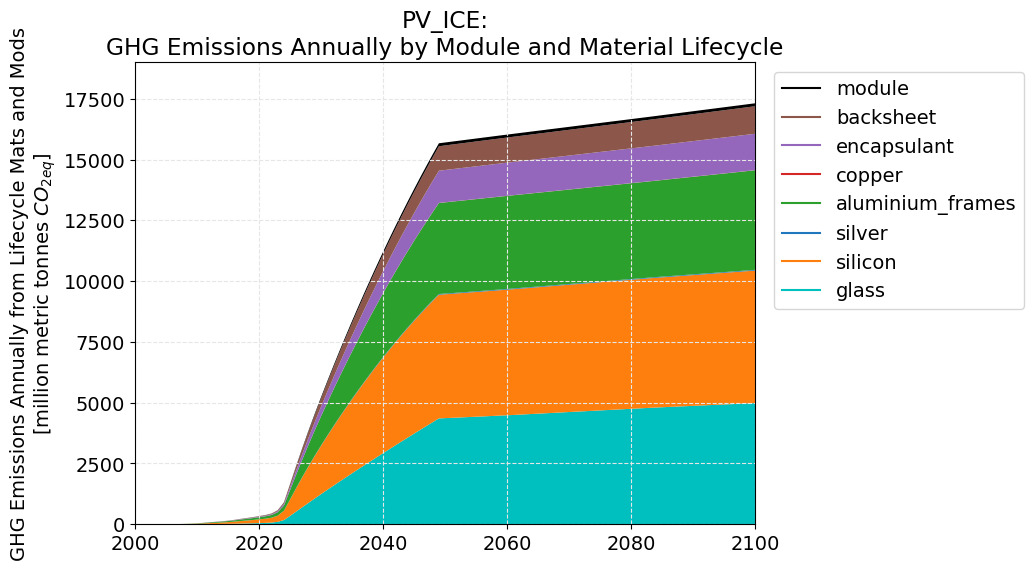

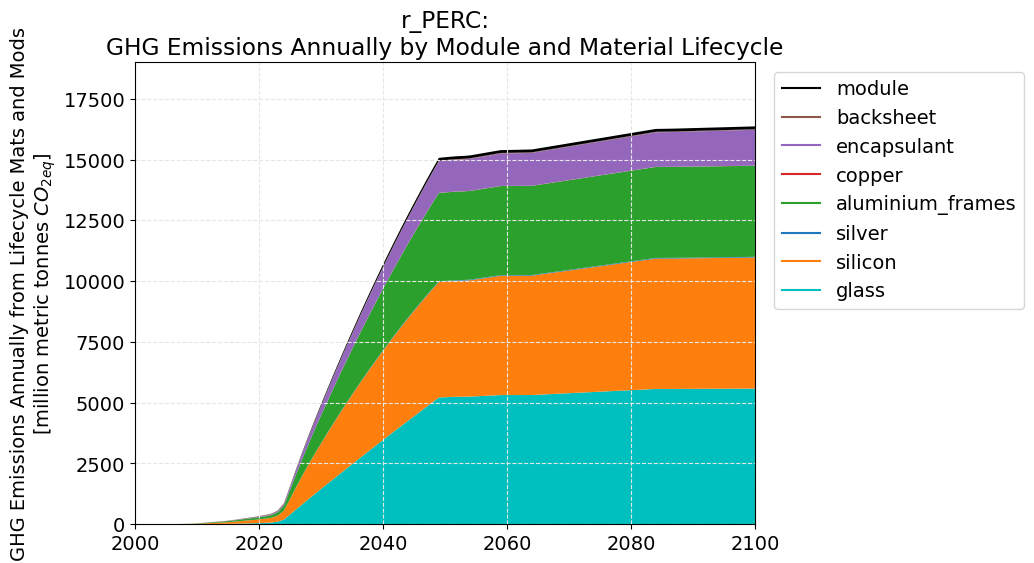

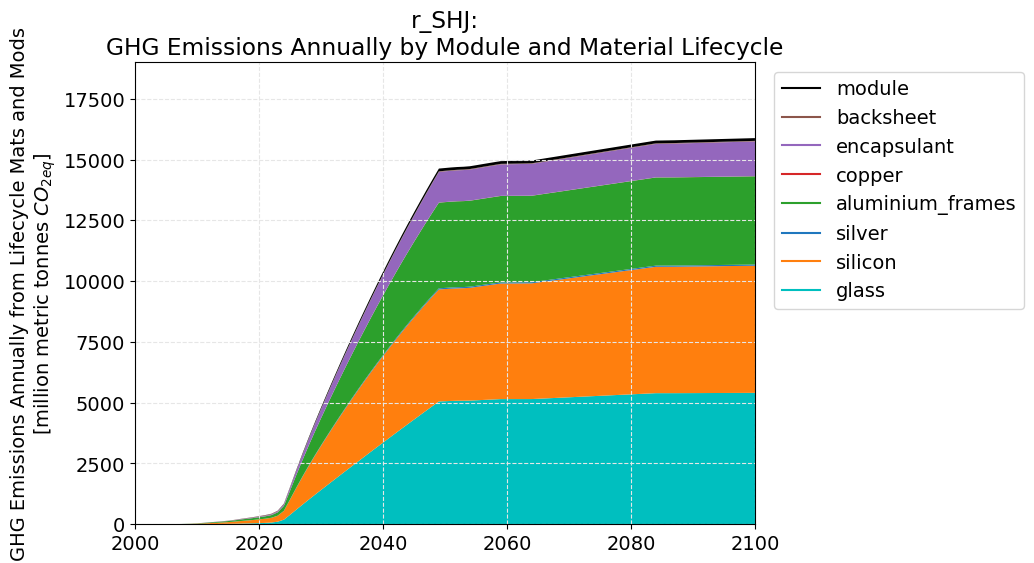

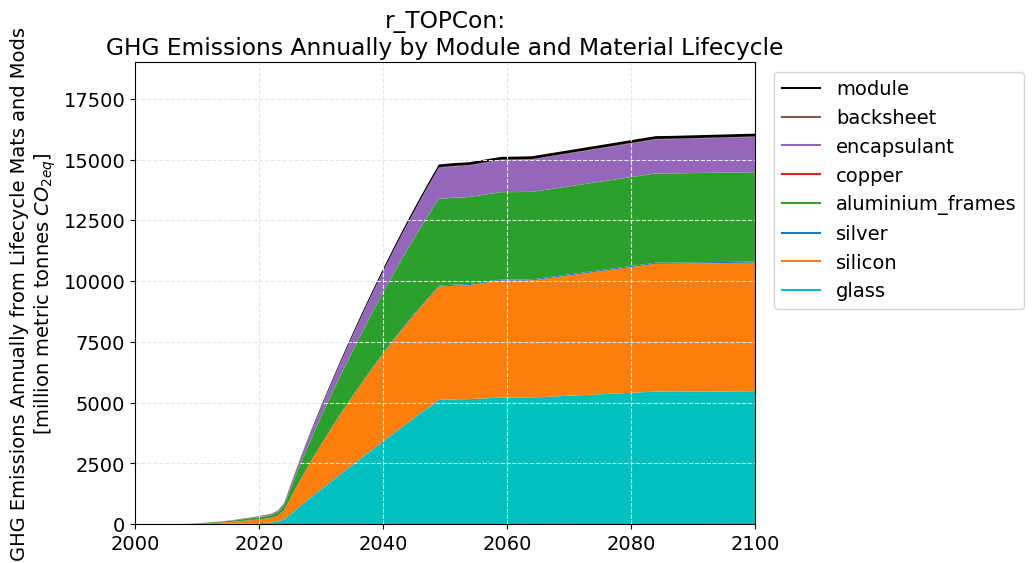

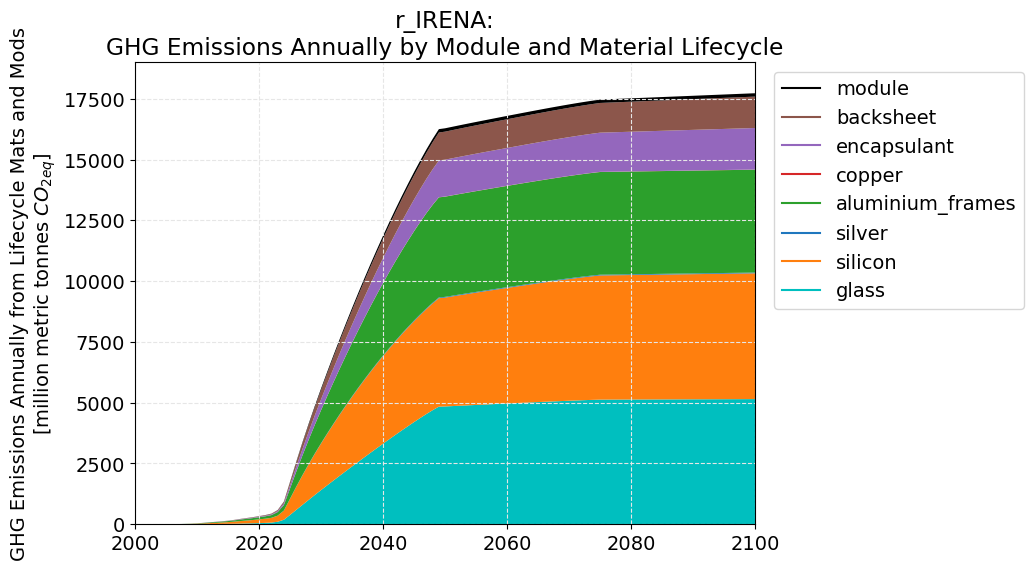

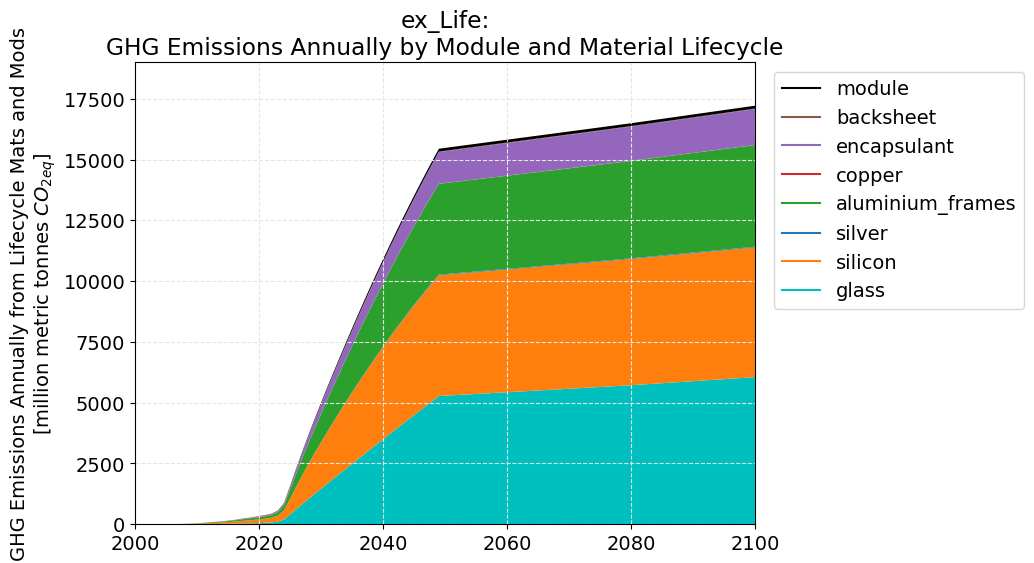

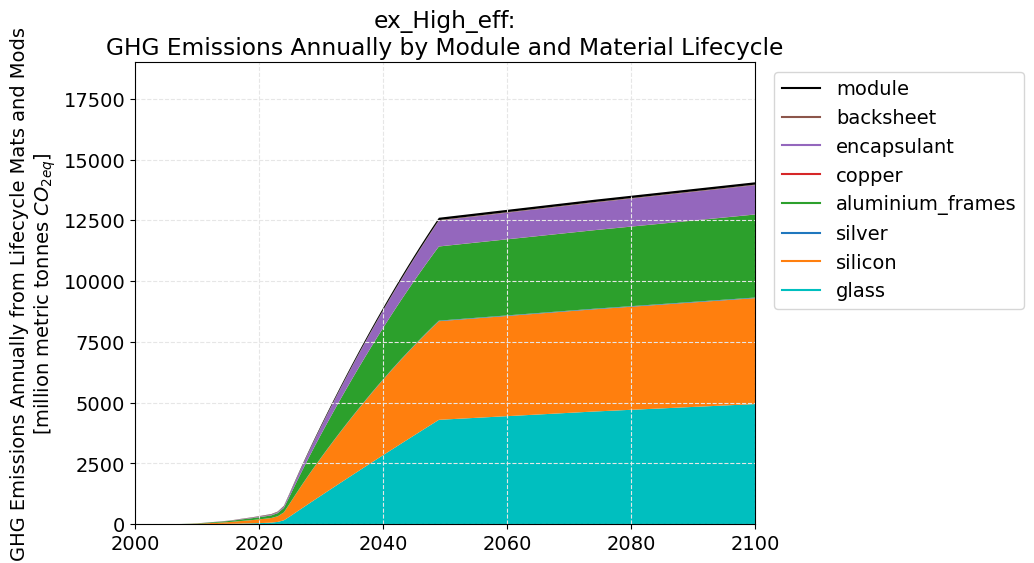

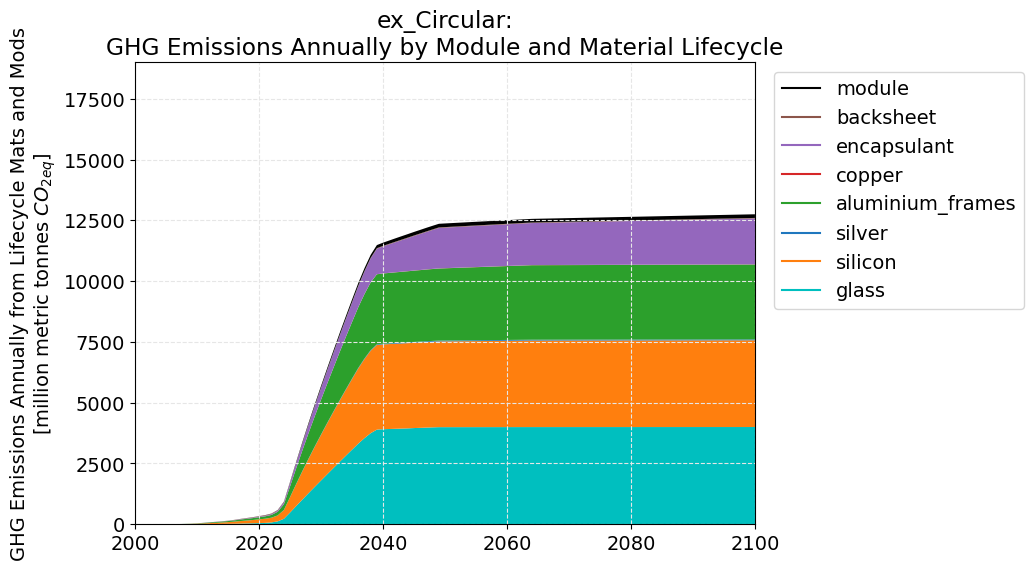

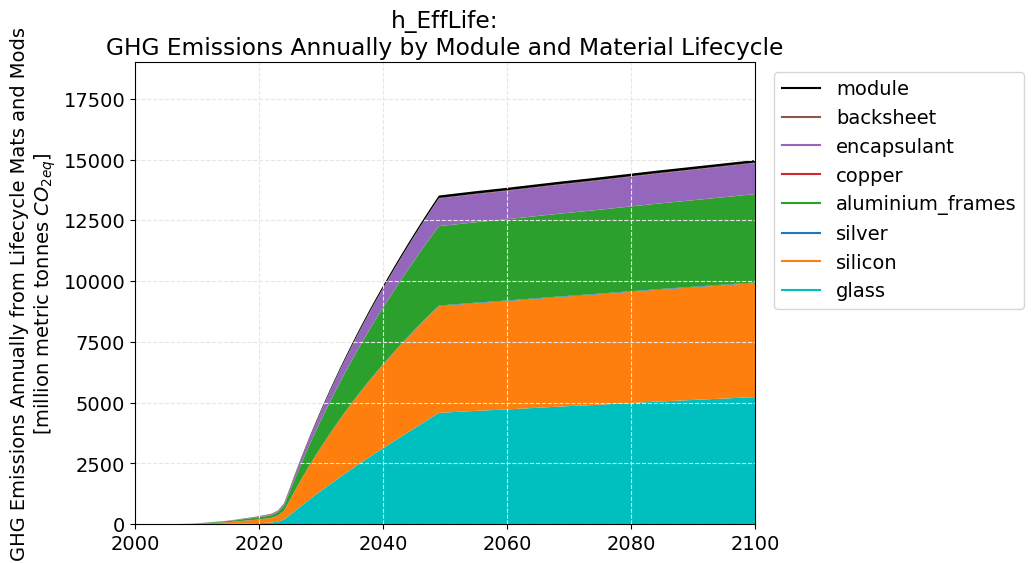

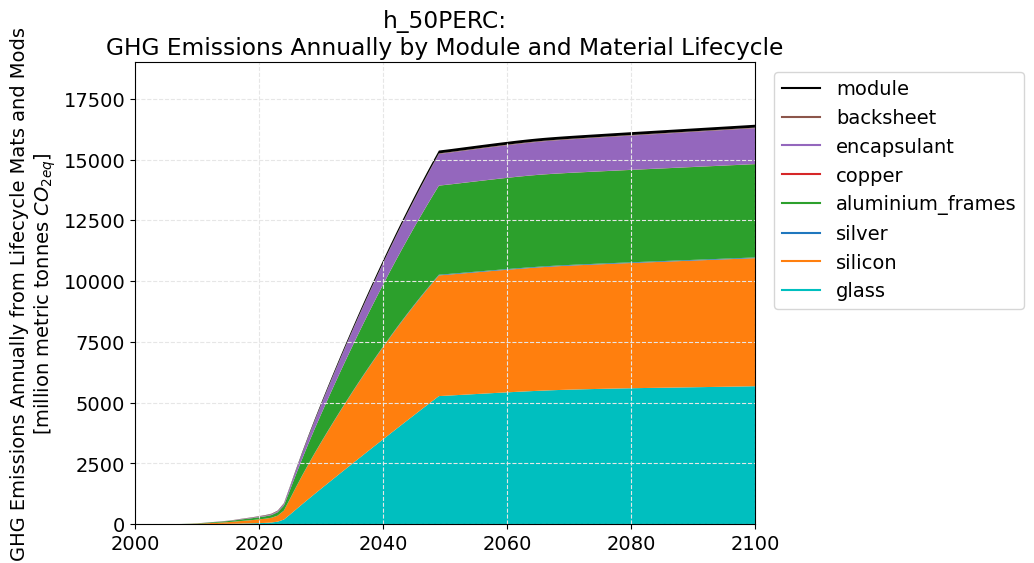

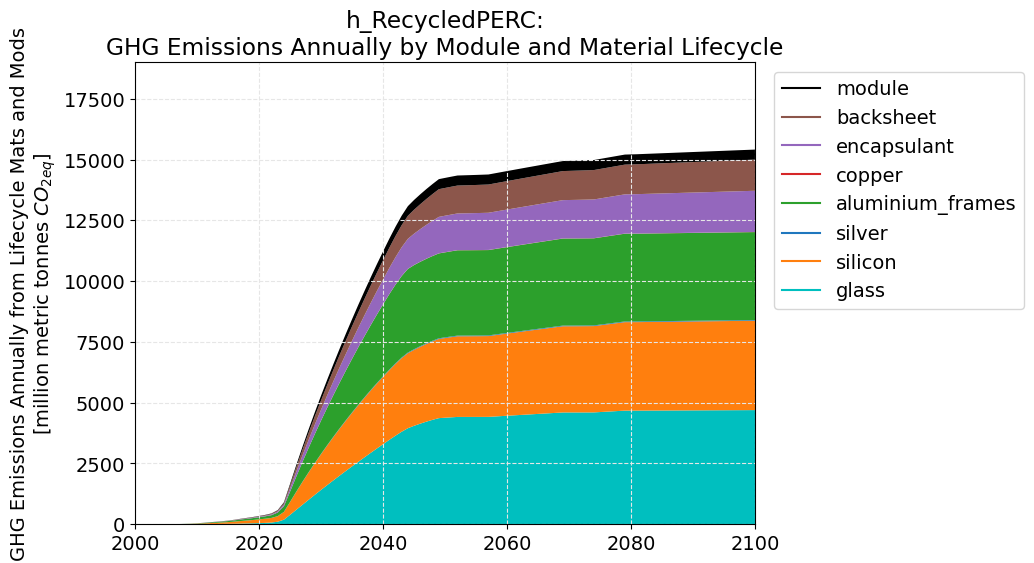

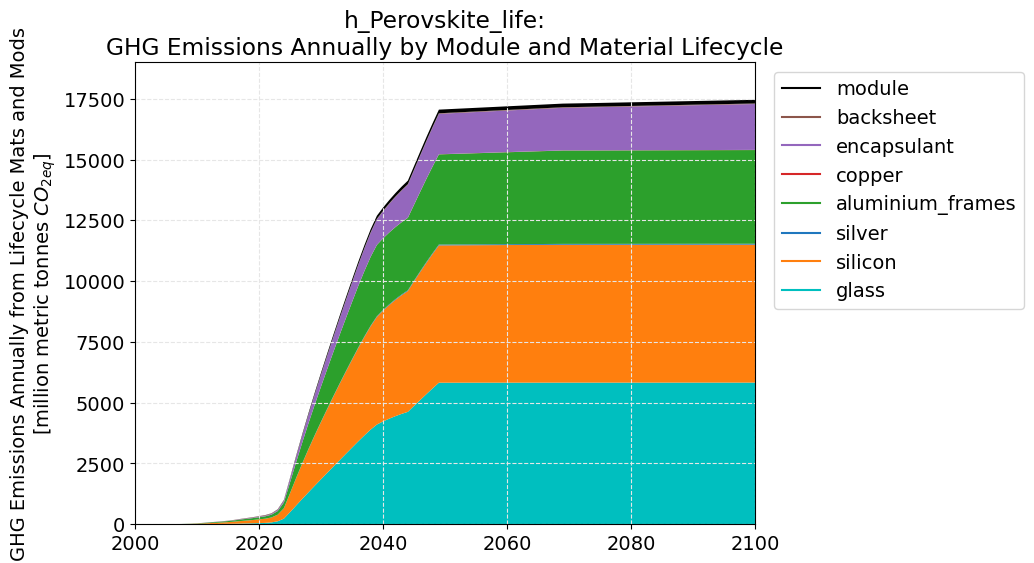

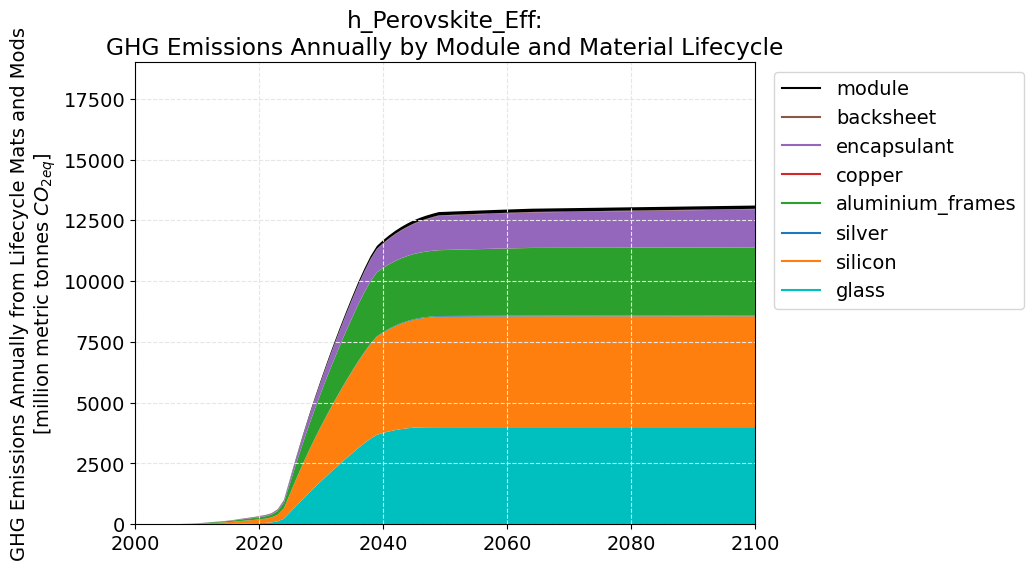

In [58]:
#colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_cumu_carbon = sim_cumu_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_cumu_carbon.index,
                  scen_cumu_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [59]:
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec')

PV_ICE_Annual_Emit_mod_elec_gCO2eq               1.212623e+14
r_PERC_Annual_Emit_mod_elec_gCO2eq               1.176445e+14
r_SHJ_Annual_Emit_mod_elec_gCO2eq                1.140823e+14
r_TOPCon_Annual_Emit_mod_elec_gCO2eq             1.154151e+14
r_IRENA_Annual_Emit_mod_elec_gCO2eq              1.384492e+14
ex_Life_Annual_Emit_mod_elec_gCO2eq              1.176026e+14
ex_High_eff_Annual_Emit_mod_elec_gCO2eq          9.591719e+13
ex_Circular_Annual_Emit_mod_elec_gCO2eq          1.499357e+14
h_EffLife_Annual_Emit_mod_elec_gCO2eq            1.054322e+14
h_50PERC_Annual_Emit_mod_elec_gCO2eq             1.176252e+14
h_RecycledPERC_Annual_Emit_mod_elec_gCO2eq       4.131835e+14
h_Perovskite_life_Annual_Emit_mod_elec_gCO2eq    1.504994e+14
h_Perovskite_Eff_Annual_Emit_mod_elec_gCO2eq     1.343677e+14
Name: 2100, dtype: float64

In [60]:
#create a df from which to do a bar chart of 2100 emissions by mat/mod
mats_emit_2100 = pd.DataFrame() #index=scennames_labels_flat
for mat in MATERIALS:
    mat_emit_2100 = pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_'+mat).values)
    mats_emit_2100 = pd.concat([mats_emit_2100, mat_emit_2100], axis=1)

mats_emit_2100
mats_emit_2100.columns = MATERIALS
modmats_emit_2100 = pd.concat([mats_emit_2100,pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec').values)], axis=1)
modmats_emit_2100.index = scennames_labels_flat
modmats_emit_2100.rename(columns={0:'module'}, inplace=True)
modmats_emit_2100_megatonne = modmats_emit_2100/1e12
modmats_emit_2100_megatonne

glass      silicon     silver  \
PV_ICE                   4985.001857  5448.307652  29.839661   
PERC                     5578.692255  5393.319933  27.196685   
SHJ                      5404.488568  5229.003200  48.366106   
TOPCon                   5469.155881  5290.258488  44.800550   
Low Quality              5148.165856  5173.238230  30.583029   
Long-Lived               6051.318916  5333.231049  30.098188   
High Eff                 4943.600668  4356.612258  24.535788   
Circular                 3999.733407  3565.725421  36.946349   
High Eff + Long-life     5230.392826  4689.431162  26.534052   
Long-Life + Recycling    5677.770408  5267.021086  29.159569   
Recycled-Si + Long-life  4695.649222  3675.601401  28.341953   
Circular + Long-life     5827.154288  5672.720700  36.946137   
Circular + High Eff      3994.897619  4558.780871  32.121337   

                         aluminium_frames    copper  encapsulant    backsheet  \
PV_ICE                        4094.858305  5.365279  1496.525375  1132.227441   
PERC                          3744.172023  5.258404  1475.013988    22.543243   
SHJ                           3628.670681  5.096390  1429.342371    22.543243   
TOPCon                        3671.593843  5.156713  1446.285929    22.543243   
Low Quality                   4231.029705  6.123050  1707.883773  1291.638447   
Long-Lived                    4179.999998  5.419339  1475.011937    22.542248   
High Eff                      3413.679939  4.415442  1203.268142    22.543316   
Circular                      3080.907840  6.724610  1886.574753    22.543316   
High Eff + Long-life          3627.331754  4.743368  1274.296553    22.543243   
Long-Life + Recycling         3836.454427  5.258393  1475.012451    22.542496   
Recycled-Si + Long-life       3616.415040  6.079947  1693.382135  1281.497615   
Circular + Long-life          3853.274123  6.723832  1886.498520    22.543316   
Circular + High Eff           2794.351143  5.721508  1565.099428    22.543316   

                             module  
PV_ICE                   121.262267  
PERC                     117.644478  
SHJ                      114.082332  
TOPCon                   115.415102  
Low Quality              138.449161  
Long-Lived               117.602623  
High Eff                  95.917191  
Circular                 149.935702  
High Eff + Long-life     105.432179  
Long-Life + Recycling    117.625151  
Recycled-Si + Long-life  413.183500  
Circular + Long-life     150.499355  
Circular + High Eff      134.367656

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\3630820325.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\3630820325.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\3630820325.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


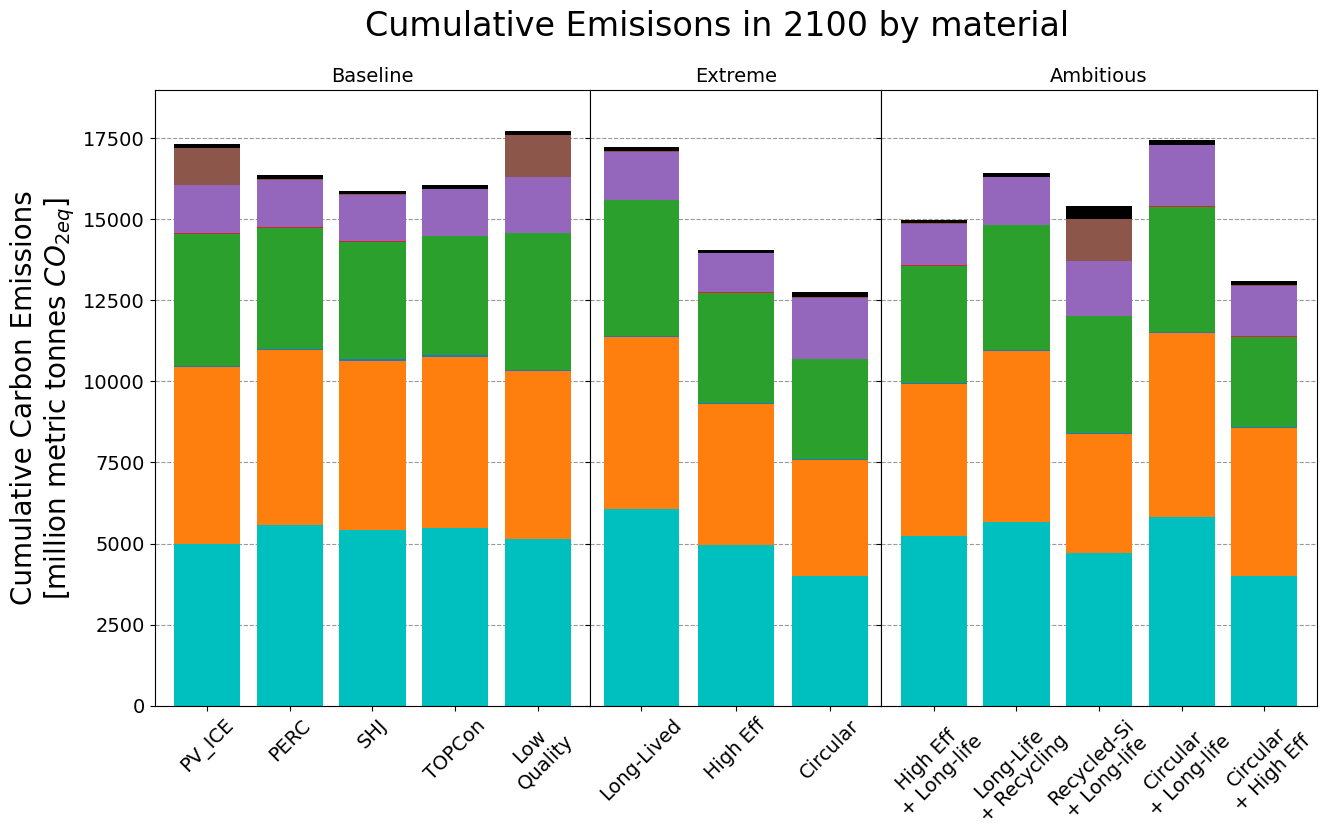

In [61]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silicon'],
        bottom=modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silicon'],
        bottom=modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silicon'],
        bottom=modmats_emit_2100_megatonne[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Cumulative Emisisons in 2100 by material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

In [62]:
cumu_emit_sum = modmats_emit_2100_megatonne.sum(axis=1)
fraction_modmats_cumu_emit = modmats_emit_2100_megatonne.div(cumu_emit_sum, axis=0)*100
fraction_modmats_cumu_emit

glass    silicon    silver  aluminium_frames  \
PV_ICE                   28.792758  31.468755  0.172350         23.651398   
PERC                     34.091582  32.958765  0.166200         22.880765   
SHJ                      34.029890  32.924929  0.304542         22.848279   
TOPCon                   34.043476  32.929906  0.278867         22.854316   
Low Quality              29.041200  29.182635  0.172521         23.867564   
Long-Lived               35.150973  30.979736  0.174835         24.280834   
High Eff                 35.149313  30.975788  0.174451         24.271480   
Circular                 31.372694  27.968467  0.289796         24.165705   
High Eff + Long-life     34.914196  31.303140  0.177122         24.213358   
Long-Life + Recycling    34.555562  32.055694  0.177468         23.349101   
Recycled-Si + Long-life  30.471144  23.851820  0.183917         23.467746   
Circular + Long-life     33.381267  32.496584  0.211649         22.073755   
Circular + High Eff      30.477062  34.778926  0.245054         21.318097   

                           copper  encapsulant  backsheet    module  
PV_ICE                   0.030989     8.643747   6.539607  0.700396  
PERC                     0.032134     9.013862   0.137763  0.718929  
SHJ                      0.032090     8.999994   0.141946  0.718331  
TOPCon                   0.032099     9.002596   0.140323  0.718416  
Low Quality              0.034541     9.634304   7.286232  0.781002  
Long-Lived               0.031480     8.568067   0.130944  0.683132  
High Eff                 0.031394     8.555312   0.160284  0.681977  
Circular                 0.052746    14.797719   0.176823  1.176050  
High Eff + Long-life     0.031663     8.506252   0.150482  0.703786  
Long-Life + Recycling    0.032003     8.977095   0.137196  0.715880  
Recycled-Si + Long-life  0.039454    10.988745   8.315932  2.681242  
Circular + Long-life     0.038518    10.806941   0.129141  0.862146  
Circular + High Eff      0.043649    11.940139   0.171983  1.025090

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\2389923115.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\2389923115.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_14008\2389923115.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


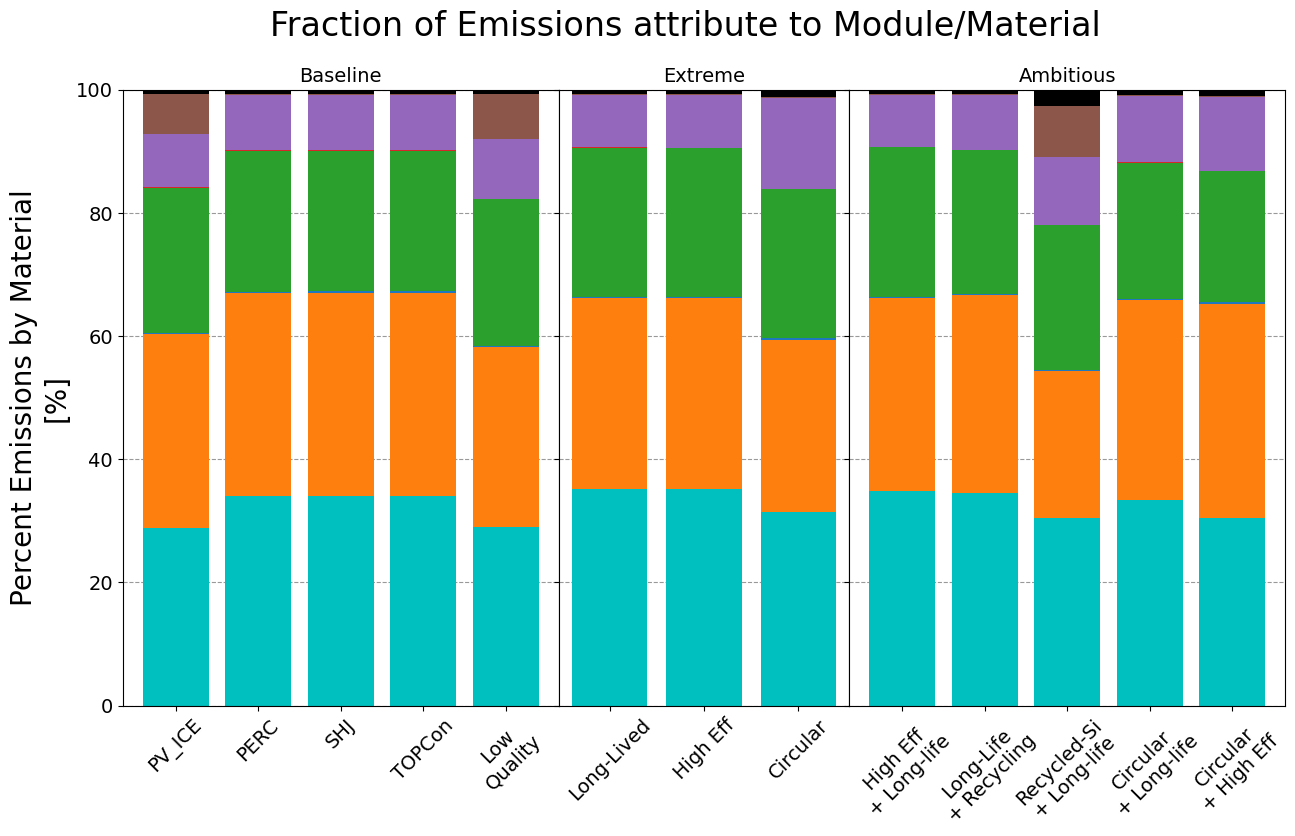

In [63]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silicon'],
        bottom=fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,100)
ax0.set_ylabel('Percent Emissions by Material\n[%]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silicon'],
        bottom=fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silicon'],
        bottom=fraction_modmats_cumu_emit[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Fraction of Emissions attribute to Module/Material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Cumulative Carbon in 2050 and 2100

In [64]:
#mins in 2050 and 2100
cumu_carbon_2050 = sim_cumu_carbon.loc[2050].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_2100 = sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_rankings_crittime = pd.concat([cumu_carbon_2050,cumu_carbon_2100], axis=1)
cumu_carbon_rankings_crittime.index = scennames_labels_flat
cumu_carbon_rankings_crittime_bmt = cumu_carbon_rankings_crittime/1000
round(cumu_carbon_rankings_crittime_bmt,1)

2050  2100
PV_ICE                   15.7  17.3
PERC                     15.1  16.4
SHJ                      14.7  15.9
TOPCon                   14.8  16.1
Low Quality              16.3  17.7
Long-Lived               15.5  17.2
High Eff                 12.6  14.1
Circular                 12.4  12.7
High Eff + Long-life     13.6  15.0
Long-Life + Recycling    15.4  16.4
Recycled-Si + Long-life  14.2  15.4
Circular + Long-life     17.1  17.5
Circular + High Eff      12.8  13.1

In [65]:
cumu_carbon_rankings_crittime_plot = cumu_carbon_rankings_crittime.copy()
cumu_carbon_rankings_crittime_plot['diff'] = cumu_carbon_rankings_crittime[2100]-cumu_carbon_rankings_crittime[2050]

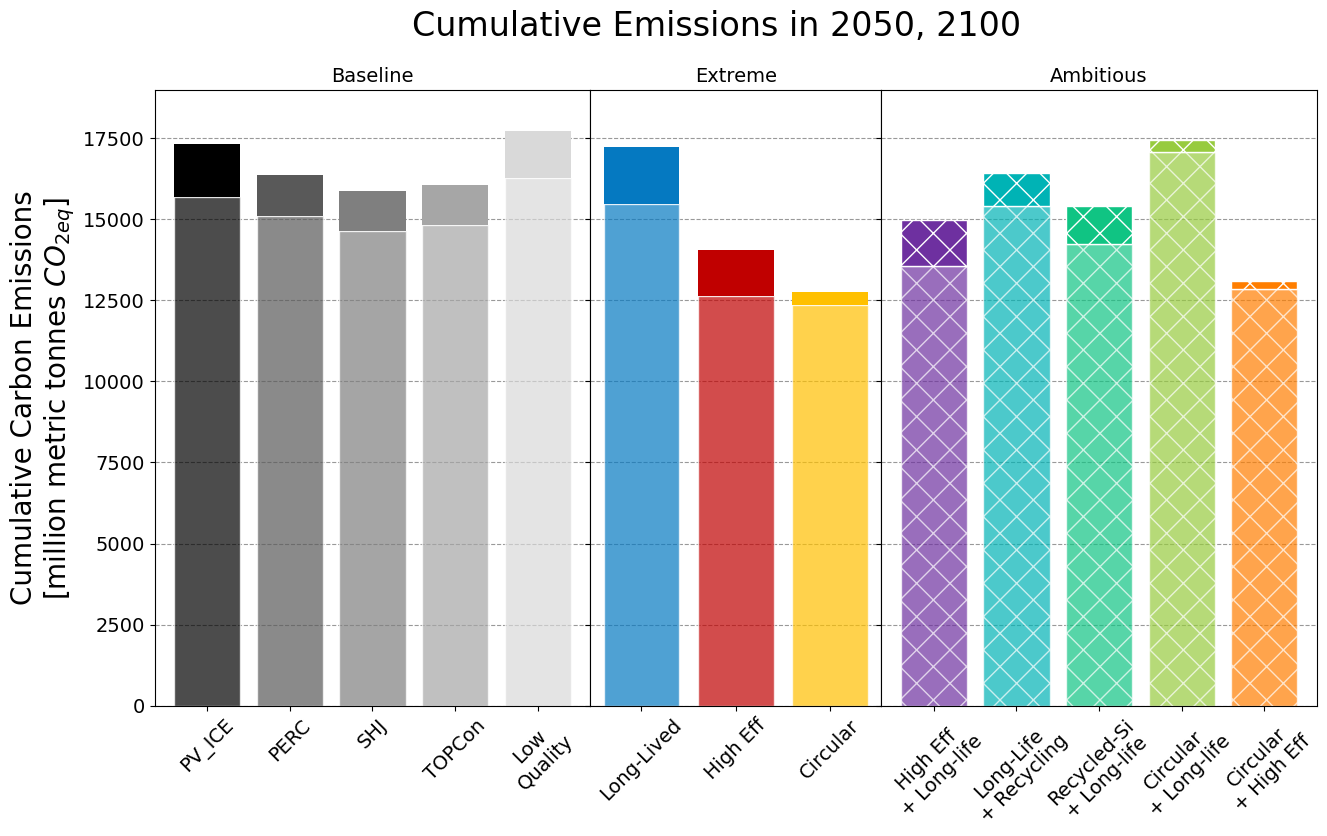

In [66]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5], alpha = 0.7, edgecolor='white')
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot['diff'].iloc[0:5],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5])
ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8], alpha = 0.7, edgecolor='white')
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot['diff'].iloc[5:8],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8])
ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white', alpha=0.7)
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot['diff'].iloc[8:],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white')
ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumulativeemit.suptitle('Cumulative Emissions in 2050, 2100', fontsize=24)
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# 

# Emissions by electricity vs fuels vs process
## Process emission summing
 This only happens on the material files

In [67]:
process_emissions = pd.DataFrame()
for scen in scenarios:
    scen_p = sim_carbon_dfs.filter(like=scen).filter(like='_p_')
    scen_p_sum = scen_p.sum(axis=1)
    process_emissions = pd.concat([process_emissions,scen_p_sum], axis=1)

process_emissions.columns = scennames_labels_flat
process_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
process_emissions_cumu = process_emissions.cumsum()

In [68]:
#process_emissions_cumu

## Fuel Emissions
This is capturing steam and heating fuel, also only on material level

In [69]:
fuel_emissions = pd.DataFrame()
for scen in scenarios:
    scen_f = sim_carbon_dfs.filter(like=scen).filter(like='_fuel_')
    scen_f_sum = scen_f.sum(axis=1)
    fuel_emissions = pd.concat([fuel_emissions,scen_f_sum], axis=1)
    
fuel_emissions.columns = scennames_labels_flat
fuel_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
fuel_emissions_cumu = fuel_emissions.cumsum()

In [70]:
#fuel_emissions_cumu

## Electricity Emissions
both module and material level elec.

In [71]:
elec_emissions = pd.DataFrame()
for scen in scenarios:
    scen_mod_elec = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #module elec lifecycle emits
    
    #material elec emits
    mat_eleckey = ['Global_vmfg_elec','landfill_elec','ReMFG_clean_elec','Recycled_LQ_elec','Recycled_HQ_elec']
    mat_elecs_search = '|'.join(mat_eleckey)
    scen_mat_elecs = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(mat_elecs_search)].filter(like=scen)
    scen_mat_elecs_sum = scen_mat_elecs.sum(axis=1)
    
    #sum them together by scen
    scen_elec_modmat_annual_sum = scen_mat_elecs_sum+scen_mod_elec.iloc[:,0]
    elec_emissions = pd.concat([elec_emissions,scen_elec_modmat_annual_sum], axis=1)
    
elec_emissions.columns=scennames_labels_flat
elec_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
elec_emissions_cumu = elec_emissions.cumsum()

In [72]:
#graphing by emission source
efp_emit_total = elec_emissions+fuel_emissions+process_emissions
efp_emit_total_cumu = elec_emissions_cumu+fuel_emissions_cumu+process_emissions_cumu

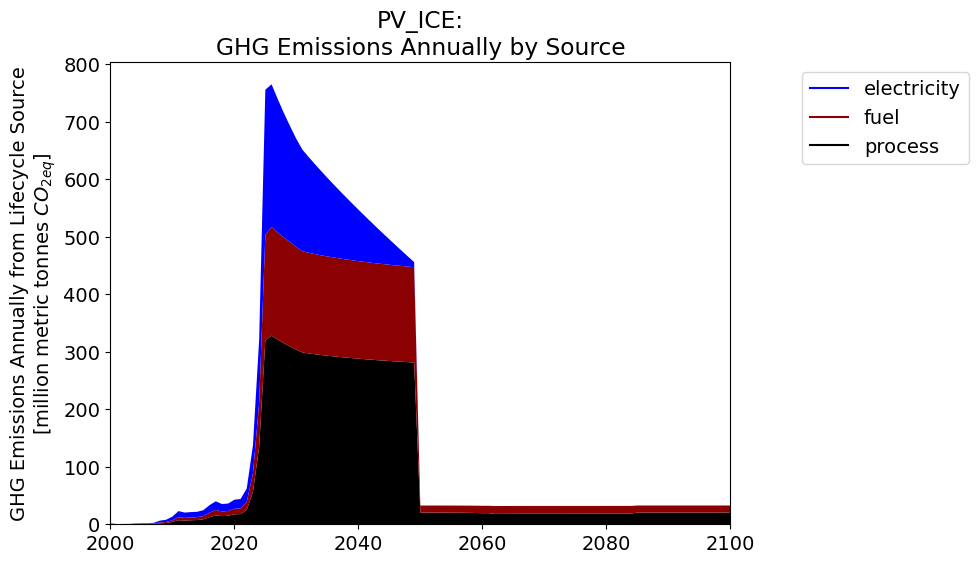

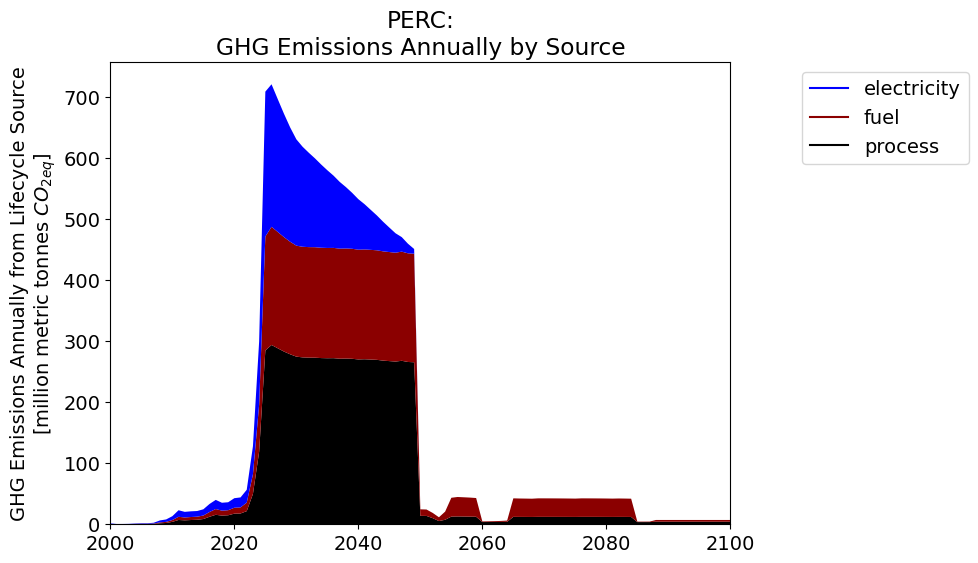

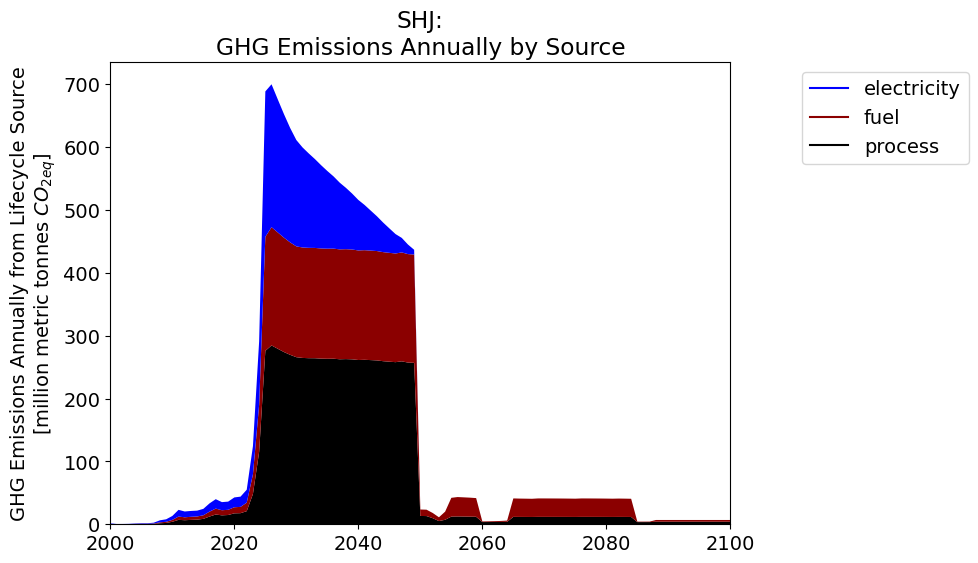

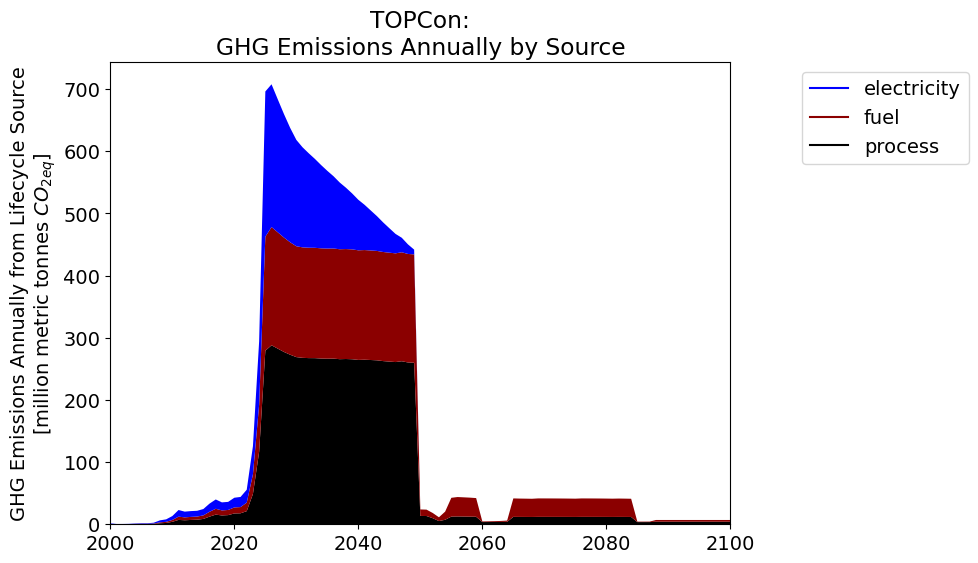

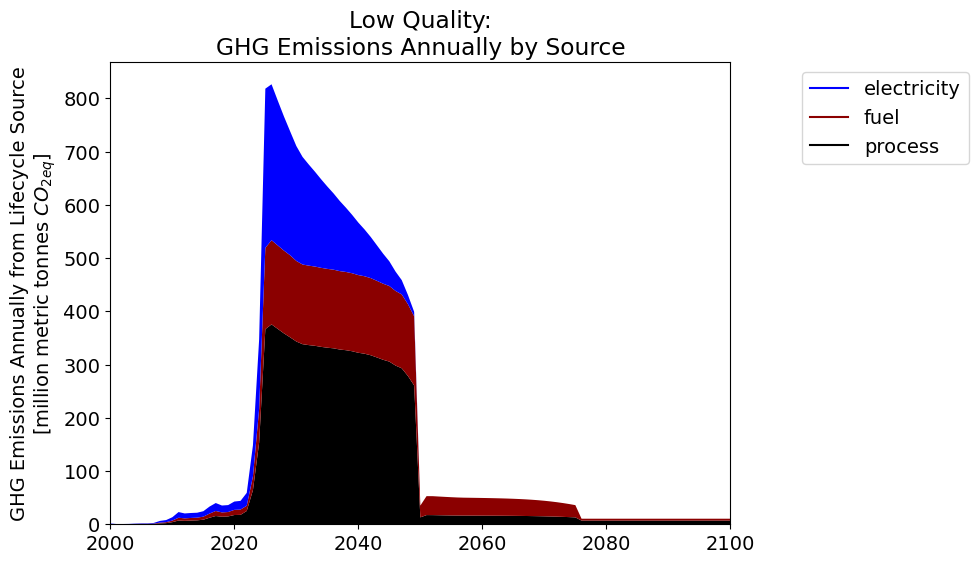

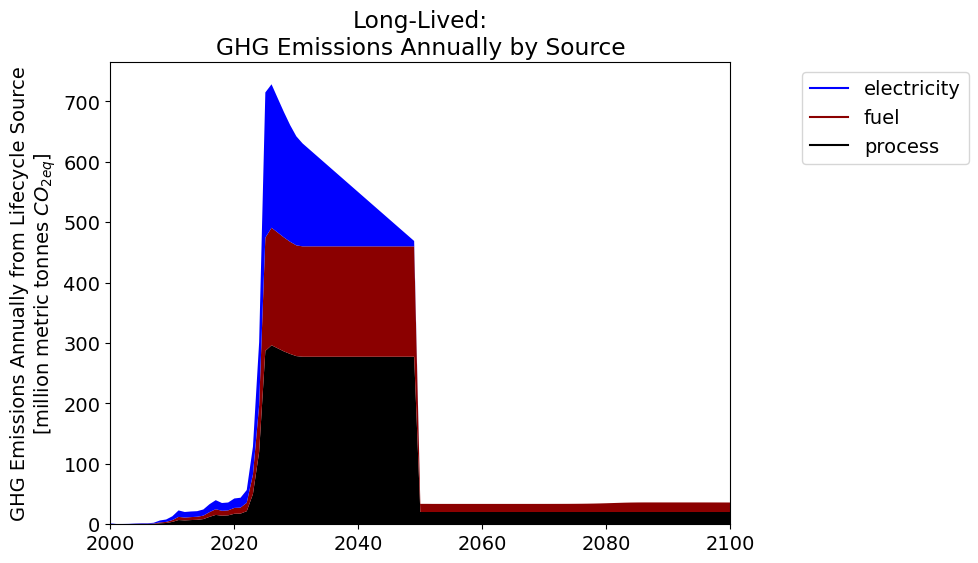

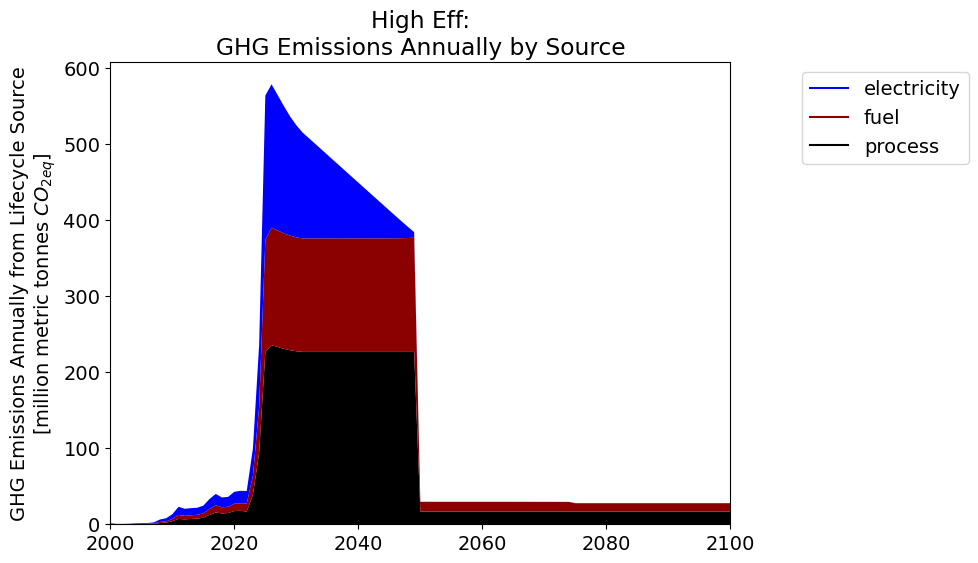

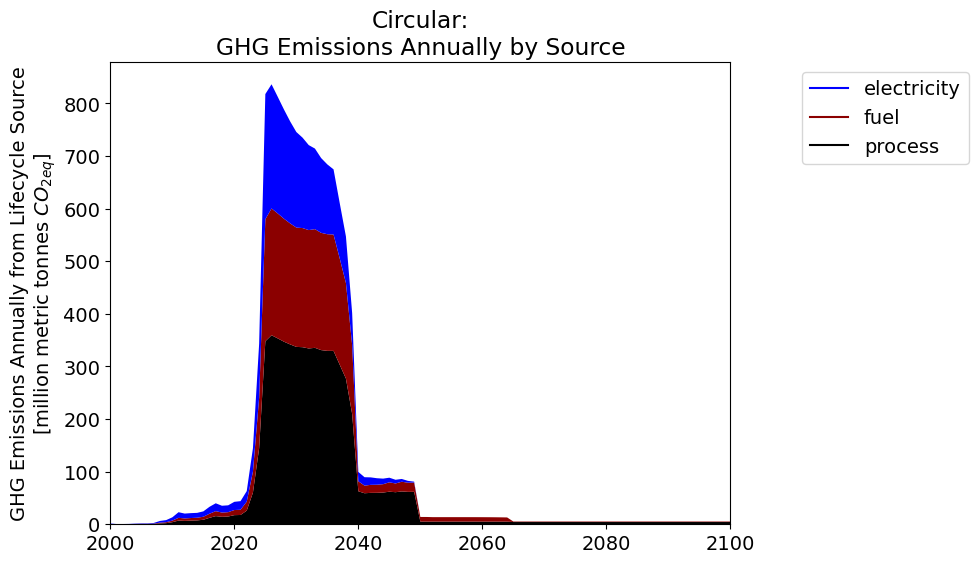

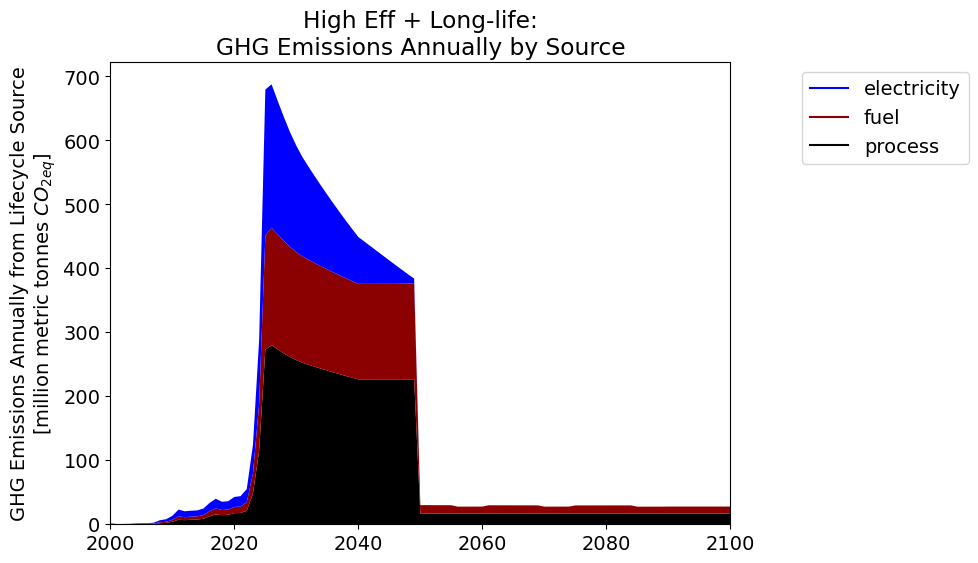

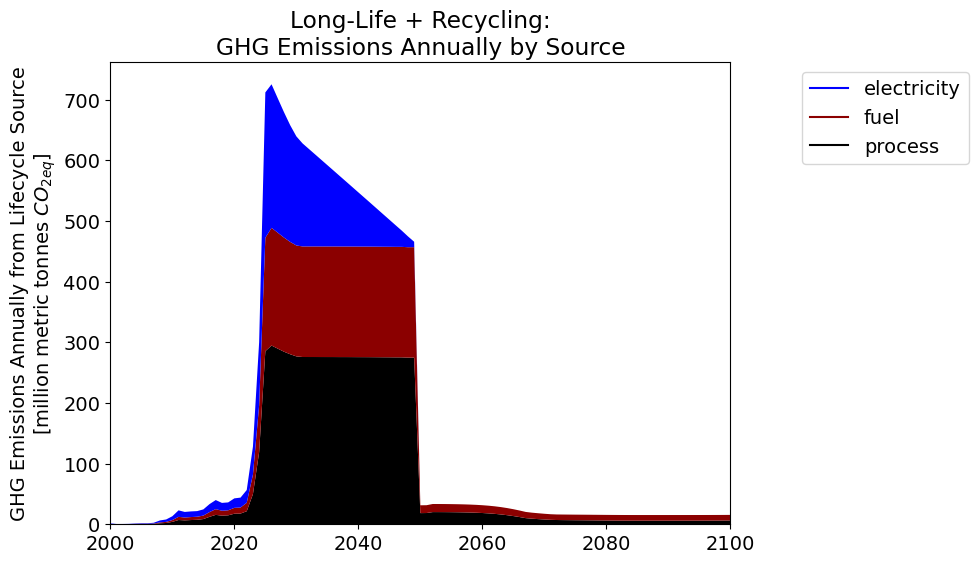

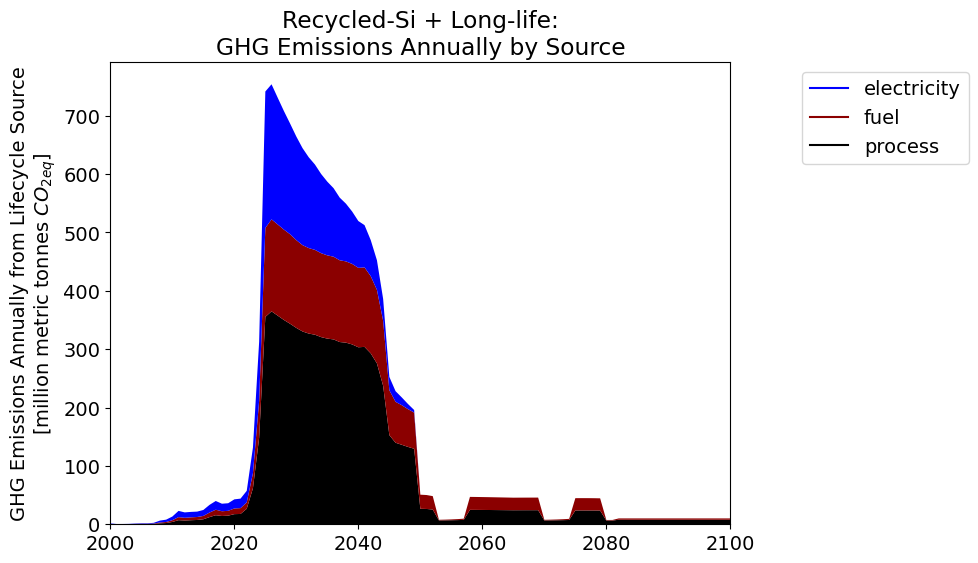

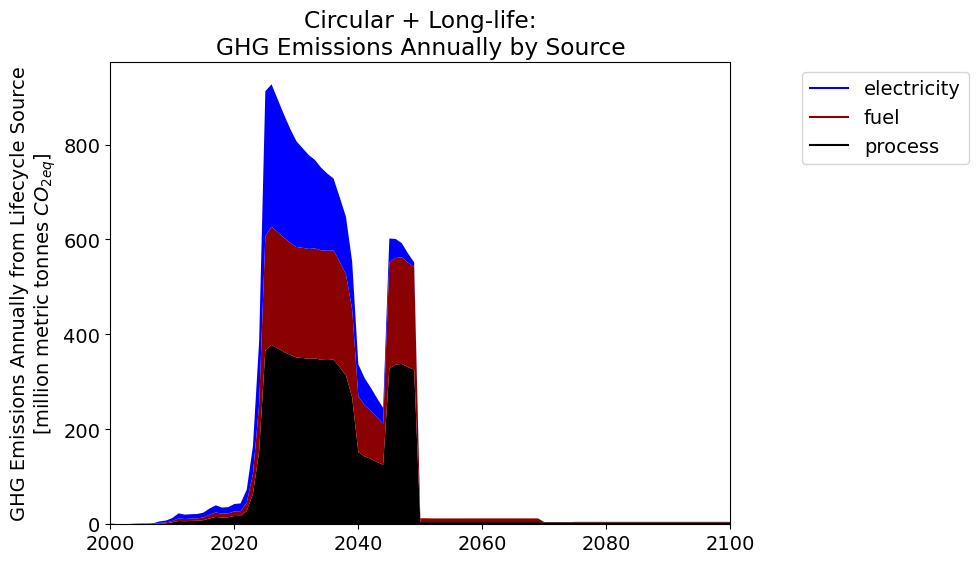

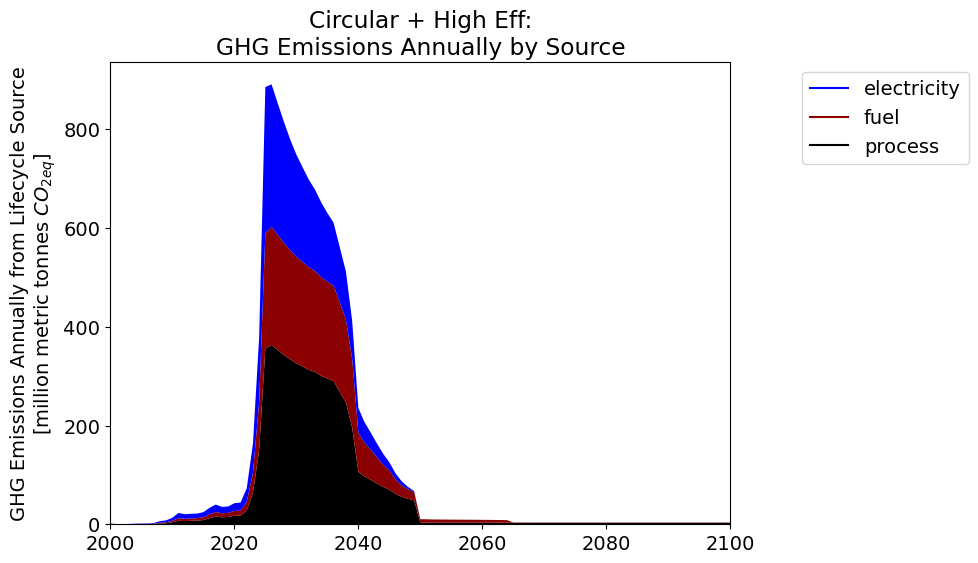

In [73]:
#graphing by emission source, annual
#efp_emit_total = elec_emissions+fuel_emissions+process_emissions

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions.index,
                  process_emissions[scen]/1e12, 
                  fuel_emissions[scen]/1e12,
                  elec_emissions[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Annually by Source')
    plt.ylabel('GHG Emissions Annually from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))
    #plt.grid(axis='both', which='both', color='0.9', ls='--', zorder=0)
    #plt.set_axisbelow(True)
#plt.legend()
    plt.show()

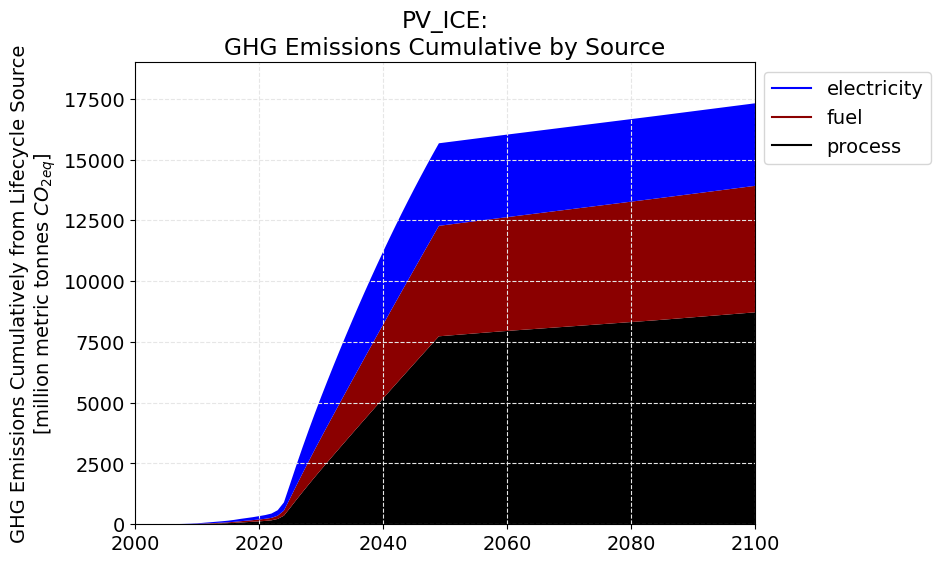

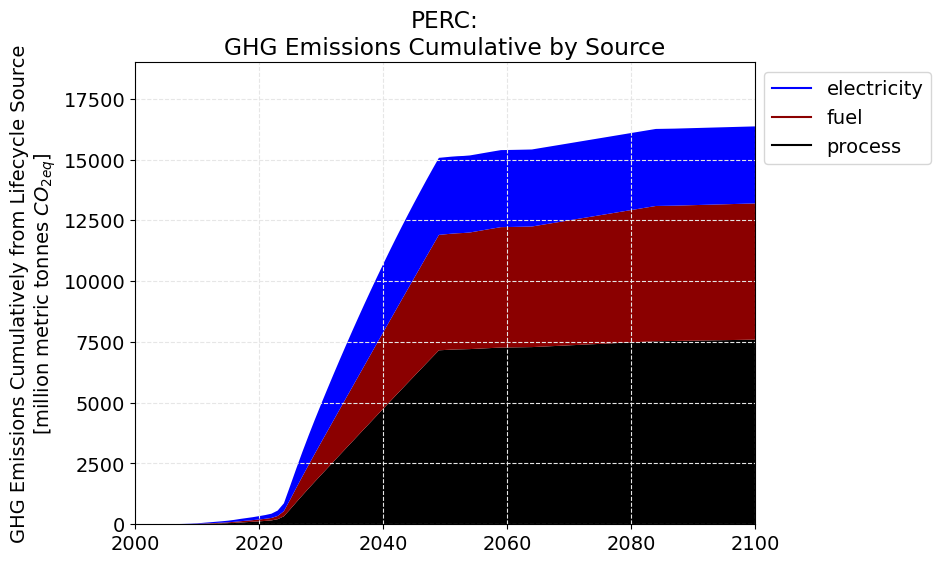

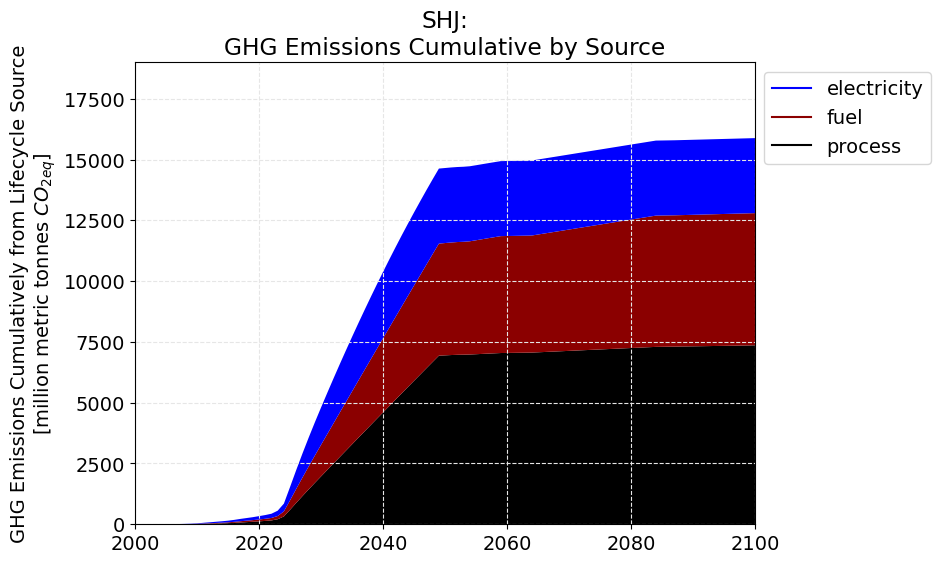

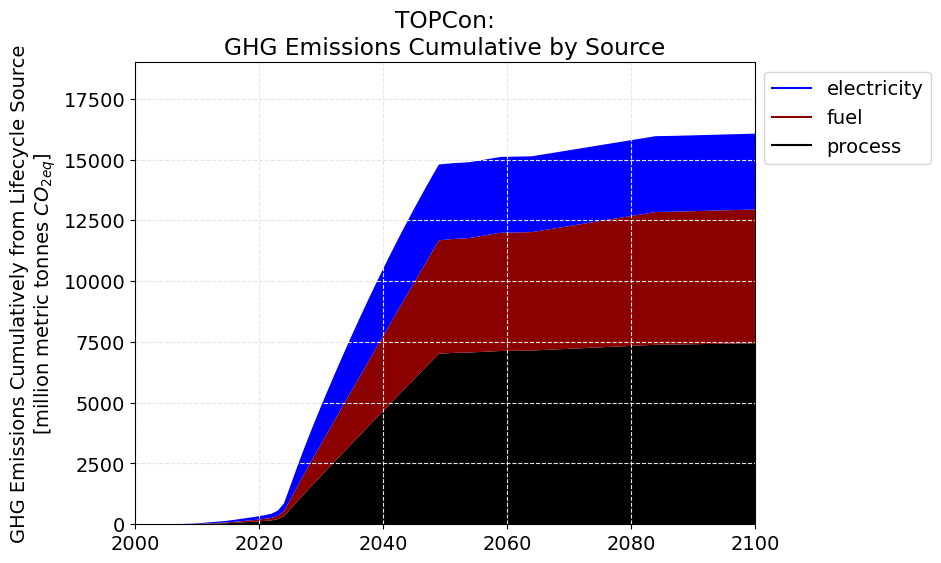

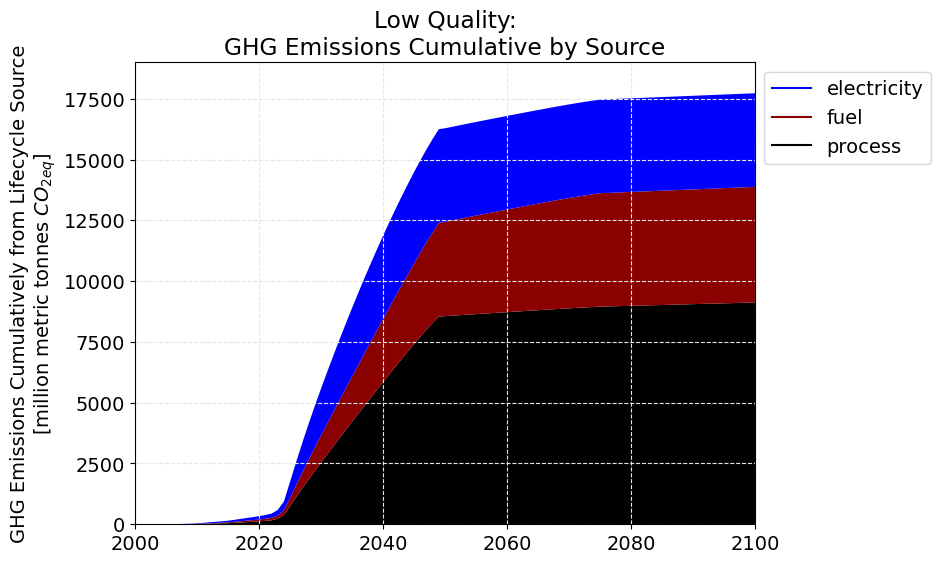

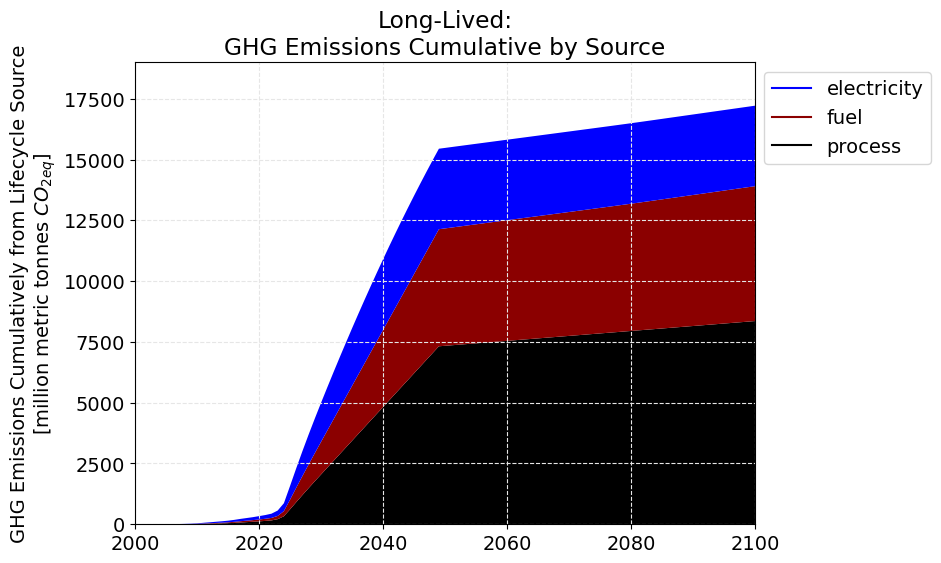

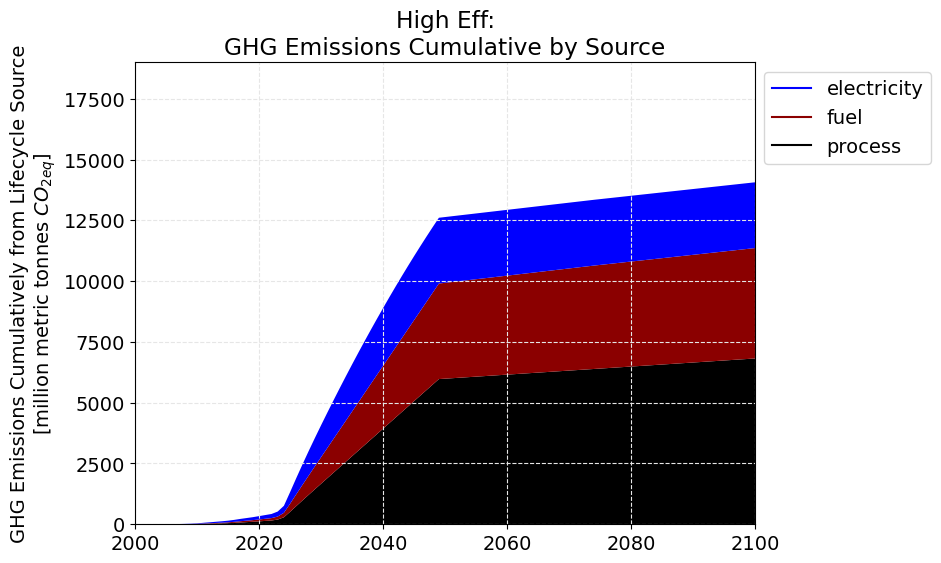

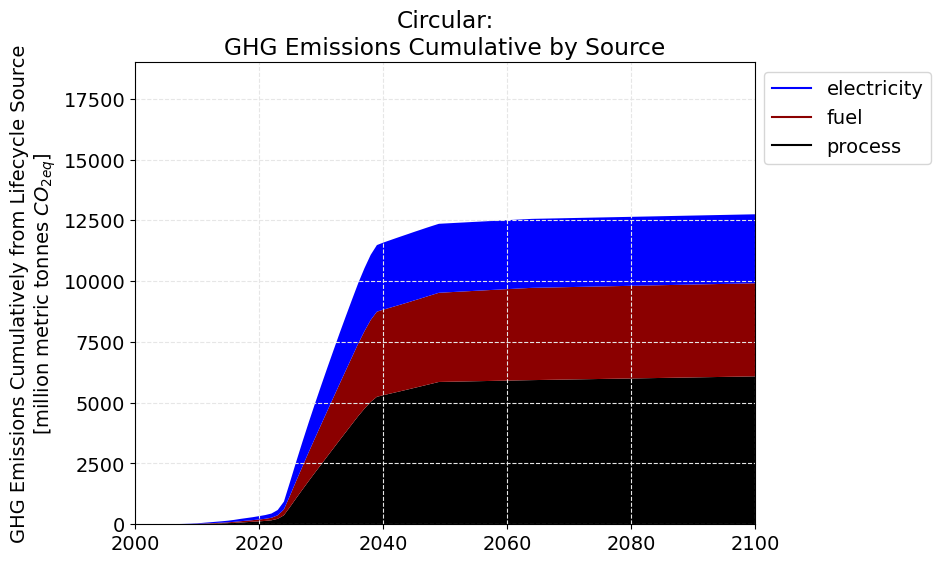

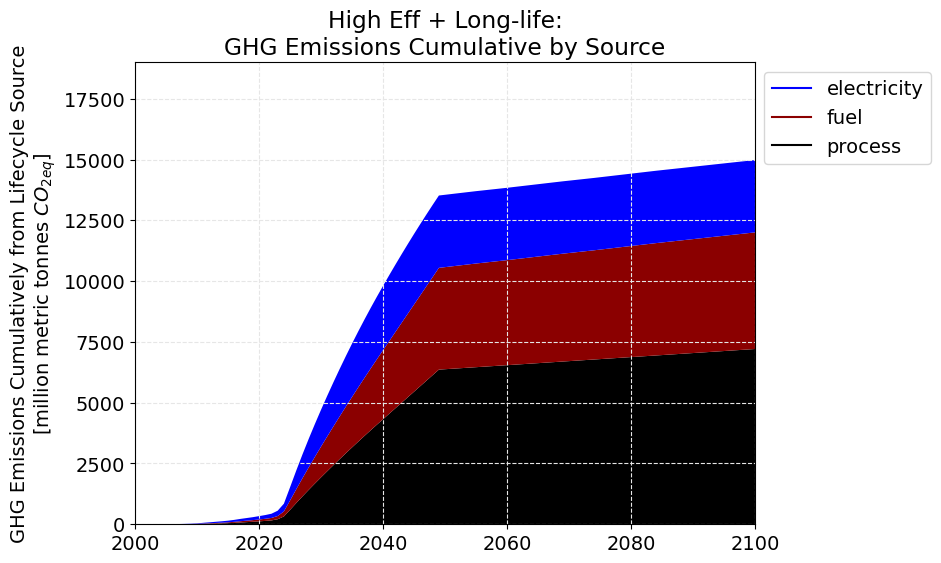

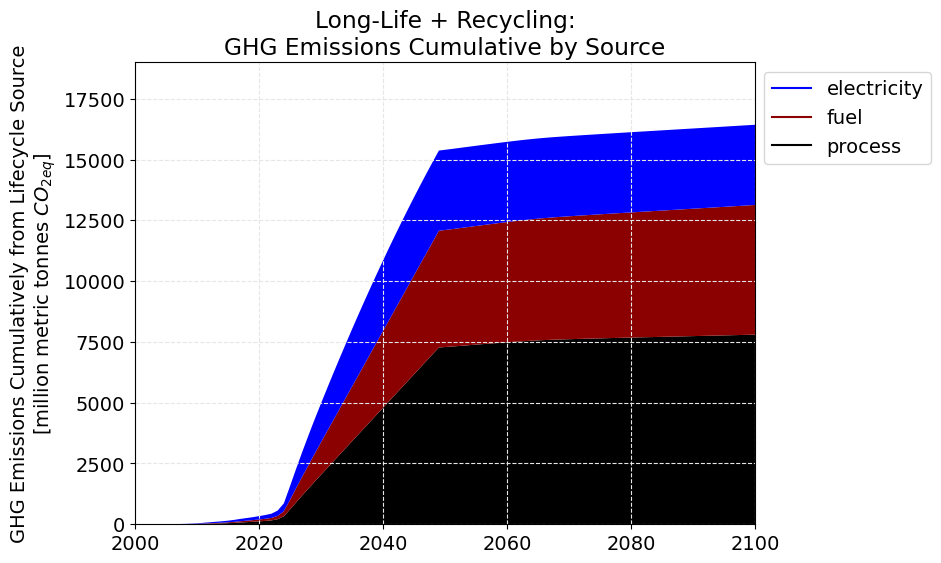

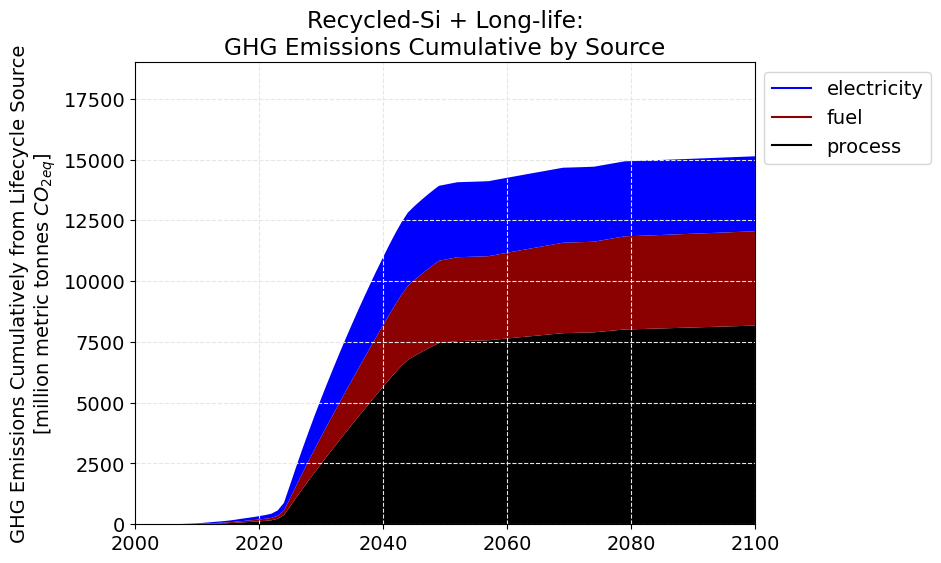

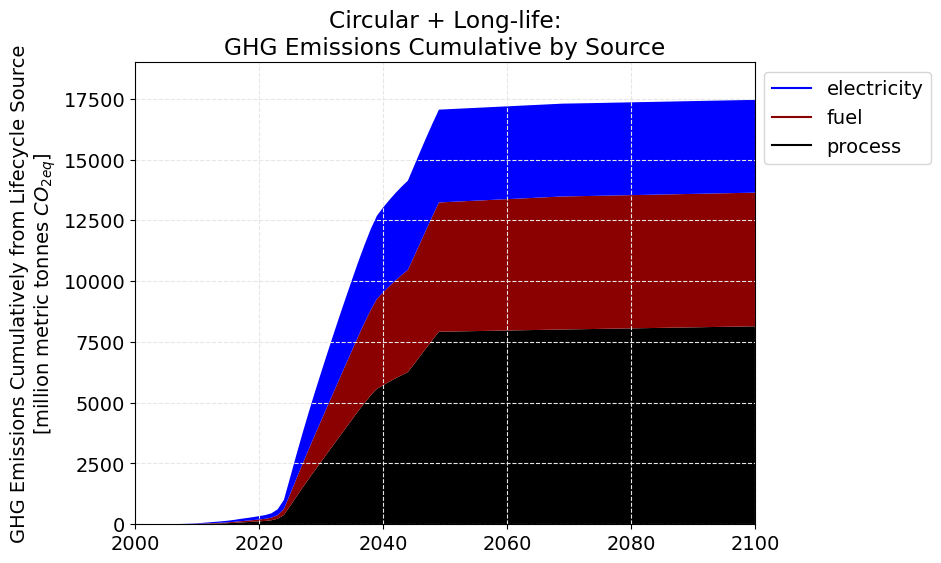

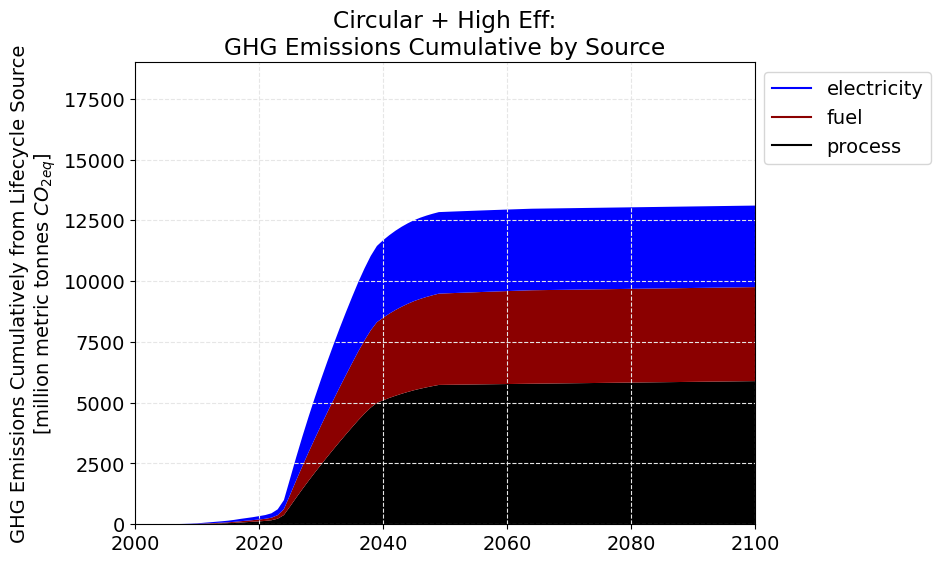

In [74]:
#graphing by emission source, cumulative

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions_cumu.index,
                  process_emissions_cumu[scen]/1e12, 
                  fuel_emissions_cumu[scen]/1e12,
                  elec_emissions_cumu[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Cumulative by Source')
    plt.ylabel('GHG Emissions Cumulatively from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [75]:
#bar chart 2050 and 2100 by scenario by emission source
emit_efp_2100_forbar = pd.concat([elec_emissions_cumu.loc[2100],fuel_emissions_cumu.loc[2100],process_emissions_cumu.loc[2100]],
                                 axis=1,keys=['electricity','fuel','process'])

In [76]:
emit_efp_2100_mmt = emit_efp_2100_forbar/1e12

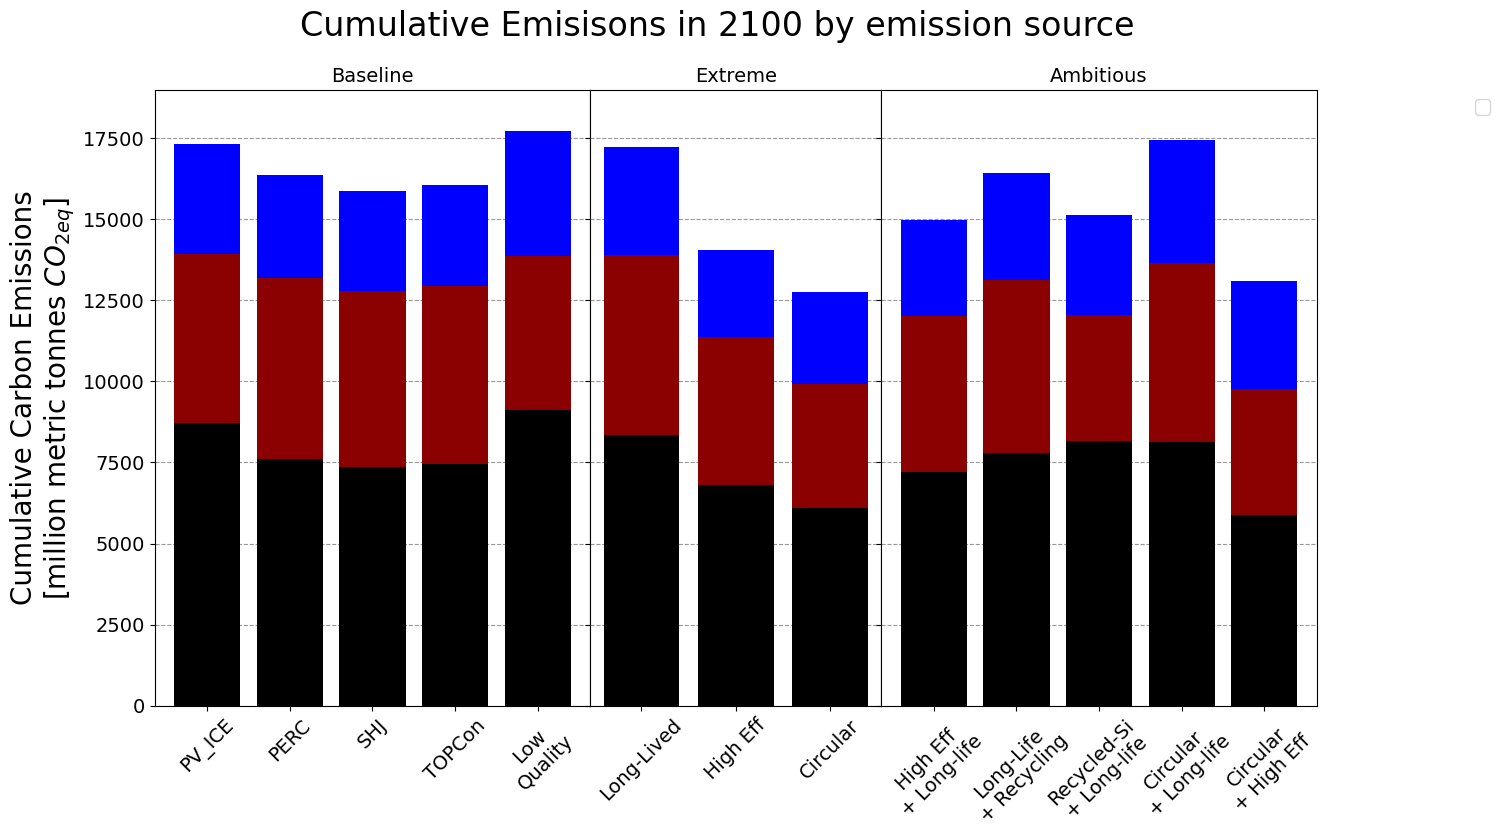

In [77]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['process'].iloc[0:5],label='process',
        tick_label=scennames_labels[0:5], color='black')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['fuel'].iloc[0:5],label='fuel',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkred')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['electricity'].iloc[0:5],label='electricity',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5]+emit_efp_2100_mmt['fuel'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='blue')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['process'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='black')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['fuel'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkred')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['electricity'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8]+emit_efp_2100_mmt['fuel'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='blue')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['process'].iloc[8:],
        tick_label=scennames_labels[8:], color='black')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['fuel'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkred')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['electricity'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:]+emit_efp_2100_mmt['fuel'].iloc[8:],
        tick_label=scennames_labels[8:], color='blue')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_cumulativeemit.suptitle('Cumulative Emisisons in 2100 by emission source', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.42,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# vMFG versus Circular Processes
3 categories for this:
- vmfg of materials
- CE of materials and materials
- install/decomission requirements 
and I think module mfging falls into the last category

In [78]:
CEkey = ['ReMFG','Recycle_Crush','Recycled_LQ','Recycled_HQ','Resell','Repair','LQ','HQ']
CEkey_search = '|'.join(CEkey)

LinearKey = ['vMFG', 'vmfg', 'landfill']
LinearKey_search = '|'.join(LinearKey)

otherkey = ['mod_MFG','OandM','Install','Demount', 'Store'] #THIS ONE IS MISSING COLUMNS!!!
otherkey_search = '|'.join(otherkey)

scen_carbon_CE.columns

scen_carbon_linear.columns

scen_carbon_other.columns

allcolumns = list(scen_annual_carbon.columns)
selectedcolumns = list(scen_carbon_other.columns)+list(scen_carbon_linear.columns)+list(scen_carbon_CE.columns)
selectedcolumns

set(allcolumns).difference(selectedcolumns)

In [79]:
#subset by pathways
sim_carbon_CE = pd.DataFrame()
sim_carbon_linear = pd.DataFrame()
sim_carbon_necessary = pd.DataFrame()

for scen in scenarios:
    scen_annual_carbon = sim_annual_carbon.filter(like=scen)
    
    scen_carbon_CE = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(CEkey_search)]
    scen_carbon_CE_sum = scen_carbon_CE.sum(axis=1)
    sim_carbon_CE = pd.concat([sim_carbon_CE, scen_carbon_CE_sum], axis=1)
    
    scen_carbon_linear = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(LinearKey_search)]
    scen_carbon_linear_sum = scen_carbon_linear.sum(axis=1)
    sim_carbon_linear = pd.concat([sim_carbon_linear,scen_carbon_linear_sum ], axis=1)
    
    scen_carbon_other = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(otherkey_search)]
    scen_carbon_other_sum = scen_carbon_other.sum(axis=1)
    sim_carbon_necessary = pd.concat([sim_carbon_necessary, scen_carbon_other_sum], axis=1)
    
sim_carbon_CE.columns = scennames_labels_flat
sim_carbon_linear.columns = scennames_labels_flat
sim_carbon_necessary.columns = scennames_labels_flat

#.index = pd.RangeIndex(start=2000,stop=2101,step=1)

In [80]:
sim_carbon_CE_cumu = sim_carbon_CE.cumsum()
sim_carbon_linear_cumu = sim_carbon_linear.cumsum()
sim_carbon_necessary_cumu = sim_carbon_necessary.cumsum()

In [81]:
emit_pathway = pd.concat([sim_carbon_CE_cumu.loc[2100],sim_carbon_linear_cumu.loc[2100],sim_carbon_necessary_cumu.loc[2100]],
                                 axis=1,keys=['Circular','Linear/Virgin','Necessary'])
emit_pathway_mmt = emit_pathway/1e12

In [82]:
sim_carbon_CE_cumu

PV_ICE          PERC           SHJ        TOPCon   Low Quality  \
2000  1.243800e+08  1.243800e+08  1.243800e+08  1.243800e+08  1.243800e+08   
2001  1.662108e+08  1.662108e+08  1.662108e+08  1.662108e+08  1.662108e+08   
2002  2.147992e+08  2.147992e+08  2.147992e+08  2.147992e+08  2.147991e+08   
2003  2.862976e+08  2.862976e+08  2.862976e+08  2.862976e+08  2.862942e+08   
2004  4.273243e+08  4.273243e+08  4.273243e+08  4.273243e+08  4.272930e+08   
...            ...           ...           ...           ...           ...   
2096  7.420225e+12  1.179466e+15  1.143291e+15  1.156837e+15  1.329943e+15   
2097  7.438469e+12  1.183025e+15  1.146738e+15  1.160326e+15  1.333718e+15   
2098  7.456712e+12  1.186584e+15  1.150186e+15  1.163815e+15  1.337492e+15   
2099  7.474955e+12  1.190143e+15  1.153633e+15  1.167304e+15  1.341267e+15   
2100  7.493198e+12  1.193701e+15  1.157081e+15  1.170792e+15  1.345041e+15   

        Long-Lived      High Eff      Circular  High Eff + Long-life  \
2000  1.243800e+08  1.243800e+08  1.243800e+08          1.243800e+08   
2001  1.662108e+08  1.662108e+08  1.662108e+08          1.662108e+08   
2002  2.147992e+08  2.147992e+08  2.147992e+08          2.147992e+08   
2003  2.862976e+08  2.862976e+08  2.862976e+08          2.862976e+08   
2004  4.273243e+08  4.273243e+08  4.273243e+08          4.273243e+08   
...            ...           ...           ...                   ...   
2096  4.380807e+10  4.380807e+10  7.164395e+14          4.380807e+10   
2097  4.380807e+10  4.380807e+10  7.172222e+14          4.380807e+10   
2098  4.380807e+10  4.380807e+10  7.180049e+14          4.380807e+10   
2099  4.380807e+10  4.380807e+10  7.187876e+14          4.380807e+10   
2100  4.380807e+10  4.380807e+10  7.195702e+14          4.380807e+10   

      Long-Life + Recycling  Recycled-Si + Long-life  Circular + Long-life  \
2000           1.243800e+08             1.243800e+08          1.243800e+08   
2001           1.662108e+08             1.662108e+08          1.662108e+08   
2002           2.147992e+08             2.147992e+08          2.147992e+08   
2003           2.862976e+08             2.862976e+08          2.862976e+08   
2004           4.273243e+08             4.273243e+08          4.273243e+08   
...                     ...                      ...                   ...   
2096           2.708795e+14             1.393553e+15          4.548003e+14   
2097           2.801246e+14             1.396966e+15          4.554503e+14   
2098           2.892311e+14             1.400379e+15          4.561004e+14   
2099           2.981477e+14             1.403792e+15          4.567504e+14   
2100           3.068082e+14             1.407205e+15          4.574005e+14   

      Circular + High Eff  
2000         1.243800e+08  
2001         1.662108e+08  
2002         2.147992e+08  
2003         2.862976e+08  
2004         4.273243e+08  
...                   ...  
2096         3.780384e+14  
2097         3.784932e+14  
2098         3.789480e+14  
2099         3.794028e+14  
2100         3.798576e+14  

[101 rows x 13 columns]

In [83]:
#emit_pathway.sum(axis=1) #check that matches, we're good
emit_pathway_mmt

Circular  Linear/Virgin   Necessary
PV_ICE                      7.493198   17184.639674  121.254963
PERC                     1193.701253   15052.537006  117.602749
SHJ                      1157.080793   14610.471474  114.040624
TOPCon                   1170.792348   14779.044015  115.373386
Low Quality              1345.041439   16243.825081  138.244730
Long-Lived                  0.043808   17097.577998  117.602492
High Eff                    0.043808   13968.611876   95.917059
Circular                  719.570248   11879.591198  149.929953
High Eff + Long-life        0.043808   14875.229281  105.432047
Long-Life + Recycling     306.808181   16006.433244  117.602556
Recycled-Si + Long-life  1407.205333   13590.819117  412.126364
Circular + Long-life      457.400456   16849.041811  149.918004
Circular + High Eff       379.857554   12594.309670  133.715653

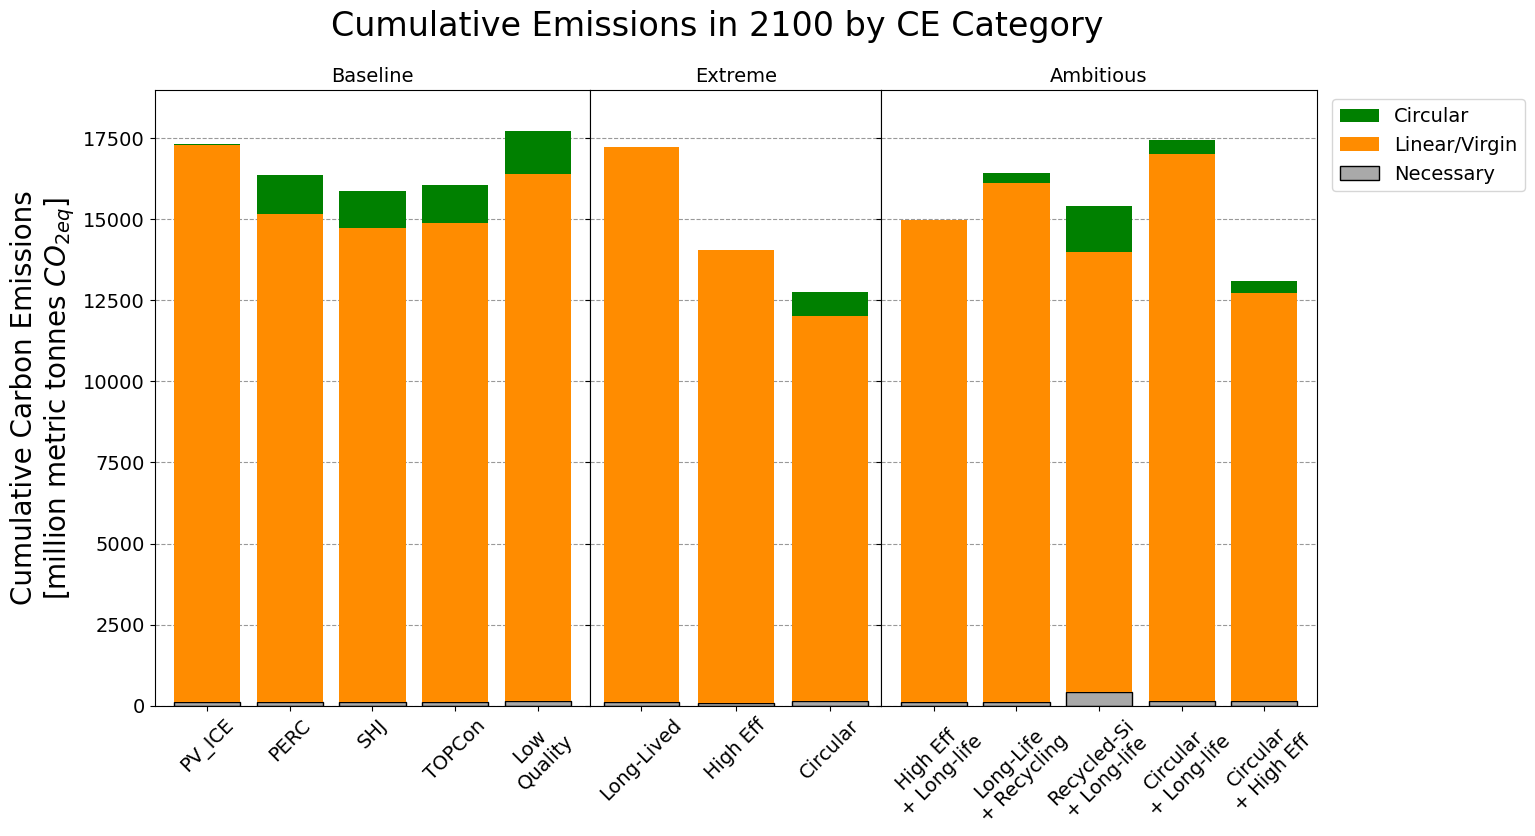

In [84]:

fig_emitByPathway, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Necessary'].iloc[0:5],label='Necessary',
        tick_label=scennames_labels[0:5], color='darkgray', edgecolor='black')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Linear/Virgin'].iloc[0:5],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkorange')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Circular'].iloc[0:5],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5]+emit_pathway_mmt['Linear/Virgin'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='green')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Necessary'].iloc[5:8],label='Necessary',
        tick_label=scennames_labels[5:8], color='darkgray', edgecolor='black')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Linear/Virgin'].iloc[5:8],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkorange')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Circular'].iloc[5:8],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8]+emit_pathway_mmt['Linear/Virgin'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='green')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Necessary'].iloc[8:],label='Necessary',
        tick_label=scennames_labels[8:], color='darkgray', edgecolor='black')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Linear/Virgin'].iloc[8:],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkorange')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Circular'].iloc[8:],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:]+emit_pathway_mmt['Linear/Virgin'].iloc[8:],
        tick_label=scennames_labels[8:], color='green')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_emitByPathway.suptitle('Cumulative Emissions in 2100 by CE Category', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.5,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Emissions per Capacity
Trying to quantify the emissions entailed in achieving energy transition target capacities. Our current calculations don't allow a good method of CO2/kWh, but we do know how much it now takes to achieve the first 75 TW then the the next 11 TW will entail a different amount of carbon. This may be a valuable comparison

In [85]:

cumu_carbon_rankings_crittime#.loc[scen,2050]

2050          2100
PV_ICE                   15701.443883  17313.387836
PERC                     15094.493922  16363.841009
SHJ                      14652.032632  15881.592891
TOPCon                   14820.826914  16065.209748
Low Quality              16285.618385  17727.111251
Long-Lived               15478.865718  17215.224298
High Eff                 12635.724189  14064.572743
Circular                 12371.731761  12749.091399
High Eff + Long-life     13551.106835  14980.705137
Long-Life + Recycling    15401.584082  16430.843982
Recycled-Si + Long-life  14245.161435  15410.150814
Circular + Long-life     17065.120639  17456.360271
Circular + High Eff      12849.848051  13107.882877

In [86]:
cumu_carbon_rankings_crittime.index = scenarios #relabel the index for the calc
scen_carbonPERcapacity = pd.DataFrame(index=scenarios)
for scen in scenarios:
    #2050
    scen_effectiveCap_TW = sim1.scenario[scen].dataOut_m.loc[50, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt = cumu_carbon_rankings_crittime.loc[scen,2050]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2050'] = scen_effectiveCap_TW
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2050'] = scen_carbon_mmt
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2050'] = scen_carbon_mmt/scen_effectiveCap_TW
    #2100
    scen_effectiveCap_TW_2100 = sim1.scenario[scen].dataOut_m.loc[100, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt_2100 = cumu_carbon_rankings_crittime.loc[scen,2100]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2100'] = scen_effectiveCap_TW_2100
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2100'] = scen_carbon_mmt_2100
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2100'] = scen_carbon_mmt_2100/scen_effectiveCap_TW_2100
    #marginal increase between 2050 and 2100

In [ ]:
round(scen_carbonPERcapacity,0)